In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# settings to display all columns<font></font>
pd.set_option("display.max_columns", None)
# display the dataframe head<font></font>
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import metrics

In [16]:
edata = pd.read_csv('energydata.csv')

In [17]:
edata.describe()

appl           lgt         temp1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

                 T5          RH_5            T6          RH_6            T7  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      19.592106     50.949283      7.910939     54.609083     20.267106   
std        1.844623      9.022034      6.090347     31.149806      2.109993   
min       15.330000     29.815000     -6.065000      1.000000     15.390000   
25%       18.277500     45.400000      3.626667     30.025000     18.700000   
50%       19.390000     49.090000      7.300000     55.290000     20.033333   
75%       20.619643     53.663333     11.256000     83.226667     21.600000   
max       25.795000     96.321667     28.290000     99.900000     26.000000   

               RH_7            T8          RH_8            T9          RH_9  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      35.388200     22.029107     42.936165     19.485828     41.552401   
std        5.114208      1.956162      5.224361      2.014712      4.151497   
min       23.200000     16.306667     29.600000     14.890000     29.166667   
25%       31.500000     20.790000     39.066667     18.000000     38.500000   
50%       34.863333     22.100000     42.375000     19.390000     40.900000   
75%       39.000000     23.390000     46.536000     20.600000     44.338095   
max       51.400000     27.230000     58.780000     24.500000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.412580    755.522602     79.750418      4.039752     38.330834   
std        5.318464      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.670000    750.933333     70.333333      2.000000     29.000000   
50%        6.920000    756.100000     83.666667      3.666667     40.000000   
75%       10.400000    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint           rv1           rv2  
count  19735.000000  19735.000000  19735.000000  
mean       3.760995     24.988033     24.988033  
std        4.195248     14.496634     14.496634  
min       -6.600000      0.005322      0.005322  
25%        0.900000     12.497889     12.497889  
50%        3.430000     24.897653     24.897653  
75%        6.570000     37.583769     37.583769  
max       15.500000     49.996530     49.996530

In [18]:
edata.head()

date  appl  lgt  temp1       RH_1    T2       RH_2     T3  \
0  11/01/2016 17:00:00    60   30  19.89  47.596667  19.2  44.790000  19.79   
1  11/01/2016 17:10:00    60   30  19.89  46.693333  19.2  44.722500  19.79   
2  11/01/2016 17:20:00    50   30  19.89  46.300000  19.2  44.626667  19.79   
3  11/01/2016 17:30:00    50   40  19.89  46.066667  19.2  44.590000  19.79   
4  11/01/2016 17:40:00    60   40  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4         T5   RH_5        T6       RH_6  \
0  44.730000  19.000000  45.566667  17.166667  55.20  7.026667  84.256667   
1  44.790000  19.000000  45.992500  17.166667  55.20  6.833333  84.063333   
2  44.933333  18.926667  45.890000  17.166667  55.09  6.560000  83.156667   
3  45.000000  18.890000  45.723333  17.166667  55.09  6.433333  83.423333   
4  45.000000  18.890000  45.530000  17.200000  55.09  6.366667  84.893333   

          T7       RH_7    T8       RH_8         T9   RH_9  T_out  \
0  17.200000  41.626667  18.2  48.900000  17.033333  45.53   6.60   
1  17.200000  41.560000  18.2  48.863333  17.066667  45.56   6.48   
2  17.200000  41.433333  18.2  48.730000  17.000000  45.50   6.37   
3  17.133333  41.290000  18.1  48.590000  17.000000  45.40   6.25   
4  17.200000  41.230000  18.1  48.590000  17.000000  45.40   6.13   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097

In [19]:
edata.isna().sum()

date           0
appl           0
lgt            0
temp1          0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [20]:
edata.corr()

appl       lgt     temp1      RH_1        T2      RH_2  \
appl         1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lgt          0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
temp1        0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1         0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2           0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2        -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3           0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3         0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4           0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4         0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5           0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5         0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6           0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6        -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7           0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7        -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8           0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8        -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9           0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9        -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out        0.099155 -0.074423  0.682854  0.340788  0.792247  0.033703   
Press_mm_hg -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out      -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed    0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility   0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint    0.015357 -0.036331  0.571333  0.639125  0.582632  0.499154   
rv1         -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
rv2         -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   

                   T3      RH_3        T4      RH_4        T5      RH_5  \
appl         0.085060  0.036292  0.040281  0.016965  0.019760  0.006955   
lgt         -0.097393  0.131161 -0.008859  0.114936 -0.078745  0.141233   
temp1        0.892402 -0.028550  0.877001  0.097861  0.885247 -0.014782   
RH_1         0.253230  0.844677  0.106180  0.880359  0.205797  0.303258   
T2           0.735245  0.121497  0.762066  0.231563  0.720550  0.029595   
RH_2         0.137319  0.678326 -0.047304  0.721435  0.110409  0.250271   
T3           1.000000 -0.011234  0.852778  0.122737  0.888169 -0.066355   
RH_3        -0.011234  1.000000 -0.140457  0.898978 -0.050062  0.375422   
T4           0.852778 -0.140457  1.000000 -0.048650  0.871813 -0.076489   
RH_4         0.122737  0.898978 -0.048650  1.000000  0.091812  0.352591   
T5           0.888169 -0.050062  0.871813  0.091812  1.000000  0.032786   
RH_5        -0.066355  0.375422 -0.076489  0.352591  0.032786  1.000000   
T6           0.686882  0.076833  0.652350  0.259047  0.629161 -0.078337   
RH_6        -0.647672  0.514912 -0.703149  0.392178 -0.632384  0.263797   
T7           0.847374 -0.250090  0.877763 -0.131204  0.870624 -0.142823   
RH_7         0.172624  0.832685  0.043527  0.894301  0.148905  0.325808   
T8           0.795283 -0.283228  0.796256 -0.167066  0.824981 -0.086991   
RH_8         0.044427  0.828822 -0.095192  0.847259  0.016388  0.359840   
T9           0.901324 -0.195270  0.889439 -0.044518  0.911055 -0.138509   
RH_9         0.134602  0.833538 -0.025549  0.856591  0.072308  0.272197   
T_out        0.699420  0.118237  0.663479  0.293307  0.651335 -0.053090   
Press_mm_hg -0.189974 -0.233274 -0.075292 -0.250748 -0.170999 -0.119327   
RH_out      -0.281718  0.356192 -0.388602  0.336813 -0.273953  0.185941   
Windspeed   -0.100776  0.263188 -0.185747

In [21]:
edata.tail()

date  appl  lgt      temp1       RH_1         T2  \
19730  27/05/2016 17:20:00   100    0  25.566667  46.560000  25.890000   
19731  27/05/2016 17:30:00    90    0  25.500000  46.500000  25.754000   
19732  27/05/2016 17:40:00   270   10  25.500000  46.596667  25.628571   
19733  27/05/2016 17:50:00   420   10  25.500000  46.990000  25.414000   
19734  27/05/2016 18:00:00   430   10  25.500000  46.600000  25.264286   

            RH_2         T3       RH_3    T4       RH_4     T5       RH_5  \
19730  42.025714  27.200000  41.163333  24.7  45.590000  23.20  52.400000   
19731  42.080000  27.133333  41.223333  24.7  45.590000  23.23  52.326667   
19732  42.768571  27.050000  41.690000  24.7  45.730000  23.23  52.266667   
19733  43.036000  26.890000  41.290000  24.7  45.790000  23.20  52.200000   
19734  42.971429  26.823333  41.156667  24.7  45.963333  23.20  52.200000   

              T6  RH_6         T7       RH_7       T8      RH_8    T9  \
19730  24.796667   1.0  24.500000  44.500000  24.7000  50.07400  23.2   
19731  24.196667   1.0  24.557143  44.414286  24.7000  49.79000  23.2   
19732  23.626667   1.0  24.540000  44.400000  24.7000  49.66000  23.2   
19733  22.433333   1.0  24.500000  44.295714  24.6625  49.51875  23.2   
19734  21.026667   1.0  24.500000  44.054000  24.7360  49.73600  23.2   

          RH_9  T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
19730  46.7900   22.7        755.2  55.666667   3.333333   23.666667   
19731  46.7900   22.6        755.2  56.000000   3.500000   24.500000   
19732  46.7900   22.5        755.2  56.333333   3.666667   25.333333   
19733  46.8175   22.3        755.2  56.666667   3.833333   26.166667   
19734  46.8450   22.2        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
19730       13.3  43.096812  43.096812  
19731       13.3  49.282940  49.282940  
19732       13.3  29.199117  29.199117  
19733       13.2   6.322784   6.322784  
19734       13.2  34.118851  34.118851

In [22]:
edata['date'] = pd.to_datetime(edata['date'])

In [23]:
edata.dtypes

date           datetime64[ns]
appl                    int64
lgt                     int64
temp1                 float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

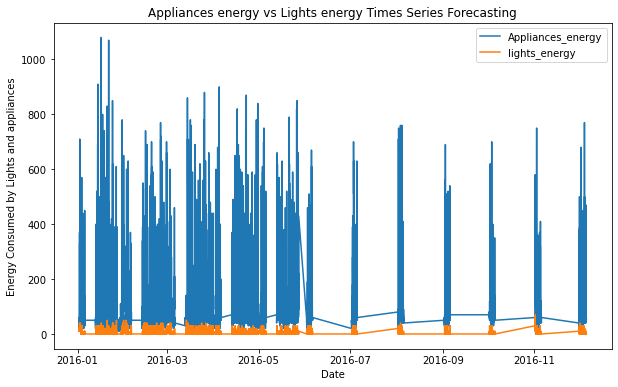

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(y=edata['appl'],x = edata['date'],linewidth = 1.5, label = 'Appliances_energy')
sns.lineplot(y=edata['lgt'],x = edata['date'],linewidth = 1.5 , label = 'lights_energy')
plt.xlabel ('Date')
plt.ylabel ('Energy Consumed by Lights and appliances')
plt.title('Appliances energy vs Lights energy Times Series Forecasting')
plt.show()

In [11]:
edata[edata['appl'] < edata['lgt']]

Empty DataFrame
Columns: [date, appl, lgt, temp1, rh_1, temp2, rh_2, temp3, rh_3, temp4, rh_4, temp5, rh_5, temp6, rh_6, temp7, rh_7, temp8, rh_8, temp9, rh_9, temp_out, press, rh_out, windspeed, visibility, dewpoint, rv1, rv2]
Index: []

[0 rows x 29 columns]

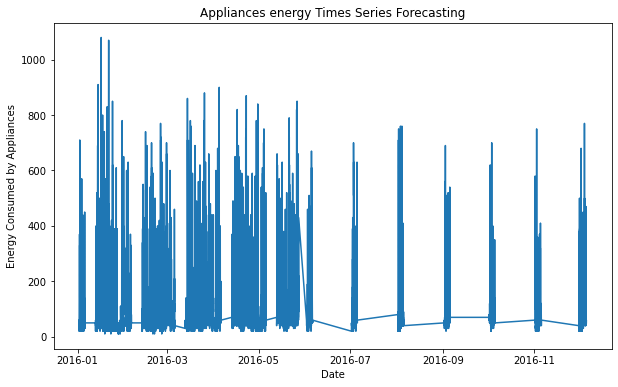

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(y=edata['appl'],x = edata['date'],linewidth = 1.5)
plt.xlim()
plt.xlabel ('Date')
plt.ylabel ('Energy Consumed by Appliances')
plt.title('Appliances energy Times Series Forecasting')
plt.show()

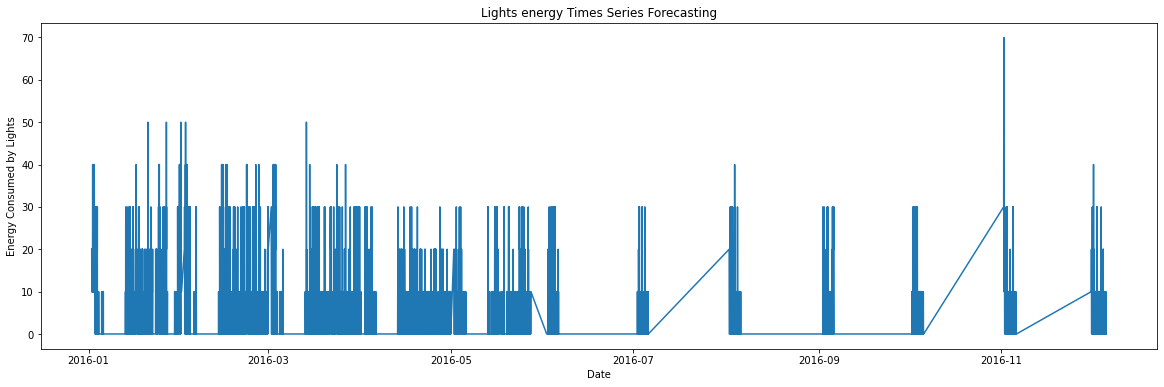

In [13]:
plt.figure(figsize=(20,6))
sns.lineplot(y=edata['lgt'],x = edata['date'],linewidth = 1.5)
plt.xlabel ('Date')
plt.ylabel ('Energy Consumed by Lights')
plt.title('Lights energy Times Series Forecasting')
plt.show()

In [14]:
edata['lgt'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lgt, dtype: int64

In [15]:
edata[edata['lgt'] == 0]['date']

51      2016-12-01 01:30:00
52      2016-12-01 01:40:00
53      2016-12-01 01:50:00
54      2016-12-01 02:00:00
55      2016-12-01 02:10:00
                ...        
19727   2016-05-27 16:50:00
19728   2016-05-27 17:00:00
19729   2016-05-27 17:10:00
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
Name: date, Length: 15252, dtype: datetime64[ns]

In [16]:
edata_lgt_energy = edata.groupby('lgt').agg({'appl' : 'mean', 'temp1':'mean', 'rh_1':'mean',
                                                   'temp2':'mean', 'rh_2':'mean', 'temp3':'mean', 
                                                    'rh_3':'mean','temp4':'mean', 'rh_4':'mean',
                                                    'temp5':'mean', 'rh_5':'mean','temp6':'mean',
                                                    'rh_6':'mean', 'temp7':'mean','rh_7':'mean',
                                                    'temp8':'mean', 'rh_8':'mean','temp9':'mean',
                                                    'rh_9':'mean', 'temp_out':'mean', 'press':'mean', 
                                                    'rh_out':'mean','windspeed':'mean', 'visibility':'mean',
                                                   'dewpoint':'mean', 'rv1':'mean', 'rv2':'mean'})
edata_lgt_energy

appl      temp1       rh_1      temp2       rh_2      temp3  \
lgt                                                                      
0     86.584710  21.723160  40.050783  20.363159  40.340166  22.389374   
10   129.037071  21.379647  40.739160  20.091564  40.436926  21.739672   
20   136.428571  21.809905  40.955904  20.498642  40.772480  22.077684   
30   150.214669  21.650877  41.501385  20.329447  41.179115  21.773656   
40   182.337662  21.051775  43.693539  19.980135  42.667587  21.170985   
50   178.888889  20.885556  43.118889  20.145556  41.607778  20.560370   
60   580.000000  20.066667  46.396667  19.426667  44.400000  19.790000   
70   230.000000  19.926667  45.863333  19.356667  44.400000  19.790000   

          rh_3      temp4       rh_4      temp5  ...      temp9       rh_9  \
lgt                                              ...                         
0    39.044983  20.896750  38.794301  19.680537  ...  19.669194  41.597347   
10   39.624906  20.332763  39.437247  19.182483  ...  18.821852  41.470343   
20   39.908179  21.207834  39.923208  19.522776  ...  19.060631  41.032837   
30   40.539395  20.957212  40.480007  19.224056  ...  18.666624  41.732034   
40   43.368568  19.708766  43.235216  18.257466  ...  17.455363  44.280715   
50   42.761481  19.405926  42.720741  17.751049  ...  17.475556  43.974074   
60   44.826667  19.000000  46.430000  17.100000  ...  16.890000  45.290000   
70   44.900000  18.890000  46.430000  17.100000  ...  17.000000  45.290000   

     temp_out       press     rh_out  windspeed  visibility  dewpoint  \
lgt                                                                     
0    7.647854  755.518225  79.260580   3.961235   38.166151  3.875799   
10   6.553445  755.923386  80.790585   4.256247   39.202469  3.176062   
20   6.847474  755.099221  81.391435   4.296036   38.488711  3.604102   
30   6.290690  755.652803  82.874776   4.450507   38.473465  3.374405   
40   5.614494  753.795455  88.876623   4.757576   41.207792  3.846922   
50   7.212222  752.216667  83.407407   5.611111   40.851852  4.363333   
60   5.980000  734.433333  91.166667   5.833333   40.000000  4.620000   
70   5.970000  734.366667  91.333333   5.666667   40.000000  4.630000   

           rv1        rv2  
lgt                        
0    24.965617  24.965617  
10   25.220429  25.220429  
20   24.784330  24.784330  
30   25.551771  25.551771  
40   23.060086  23.060086  
50   27.523265  27.523265  
60    8.827838   8.827838  
70   10.298729  10.298729  

[8 rows x 27 columns]

<Figure size 720x720 with 0 Axes>

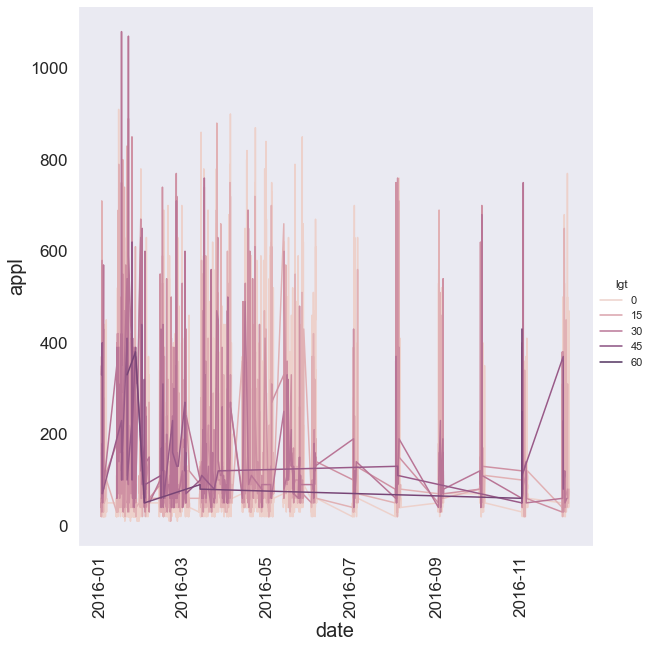

In [17]:
# Combining lineplots using relplot
plt.figure(figsize=(10,10))
sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':17,'axes.labelsize':20  , "axes.grid":False})
sns.relplot(x="date" , y="appl" , hue="lgt",kind='line', height=8.5, aspect=1 ,data=edata)
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

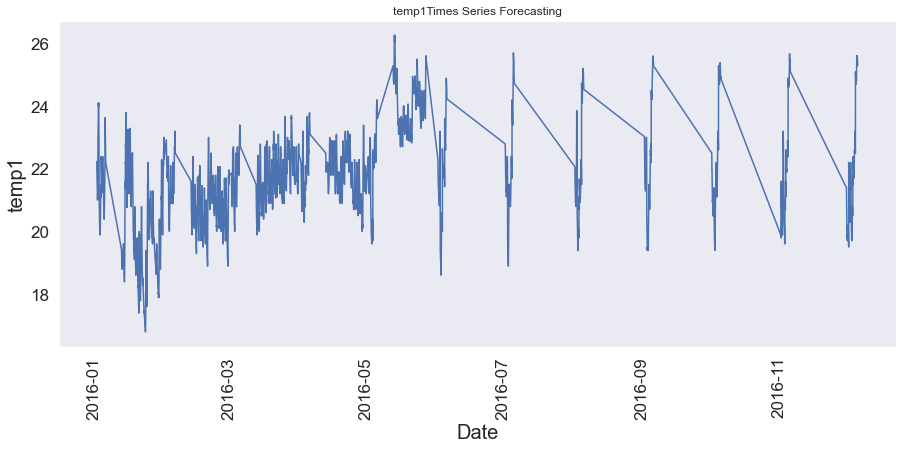

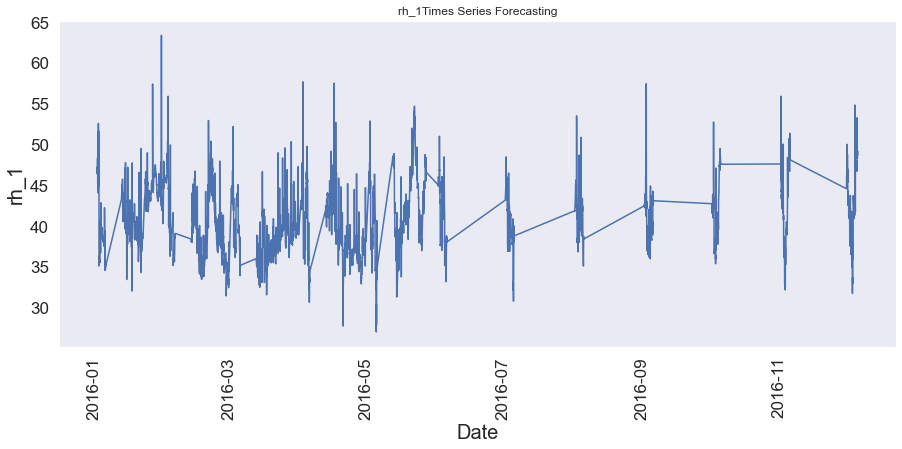

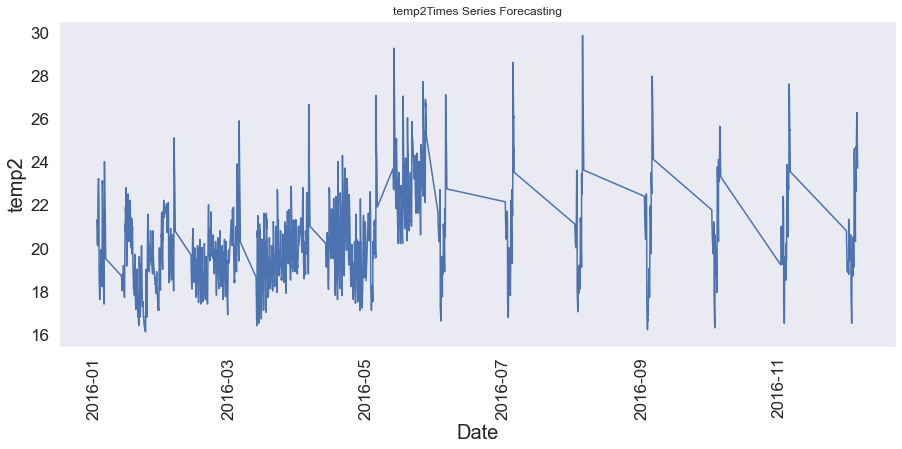

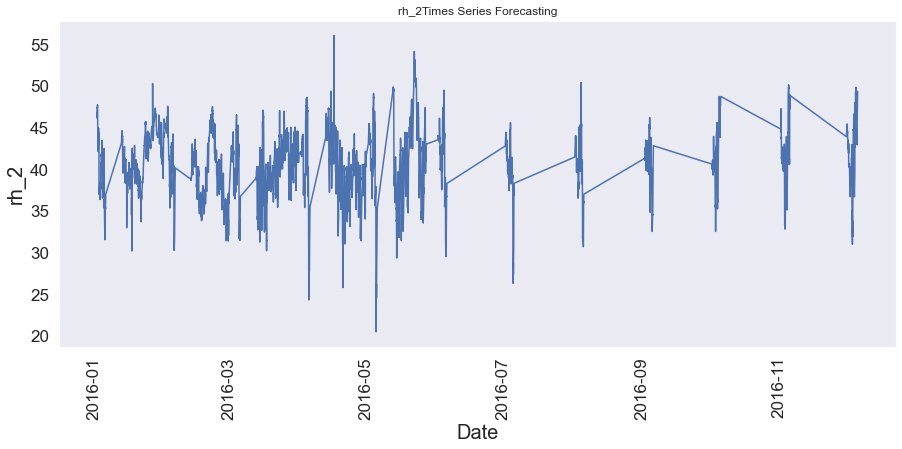

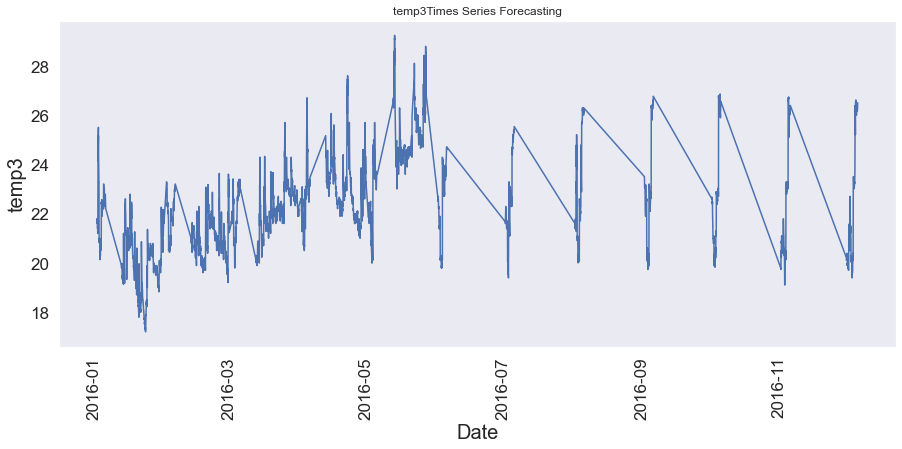

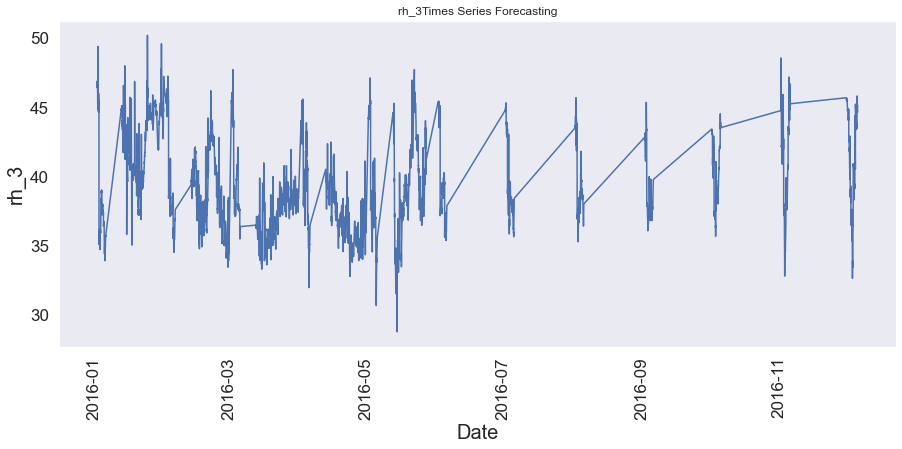

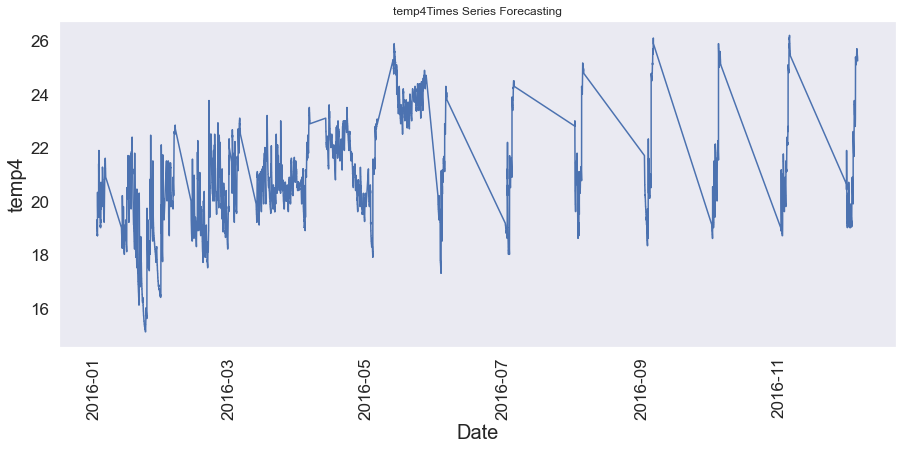

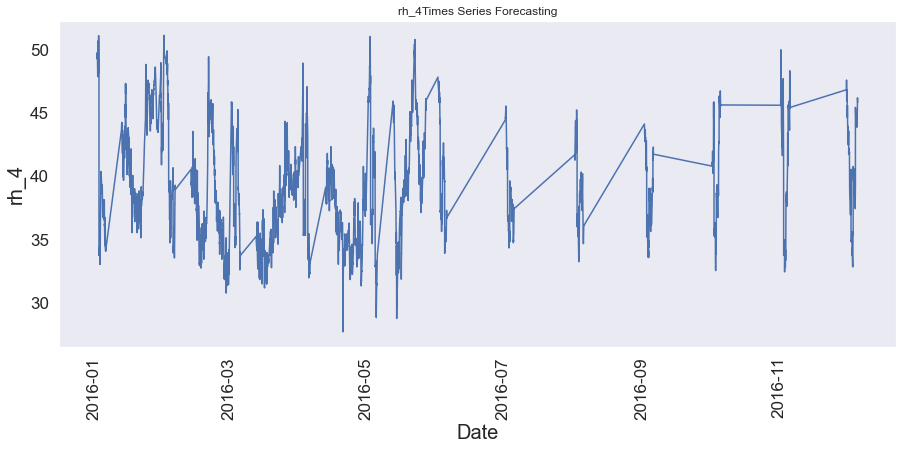

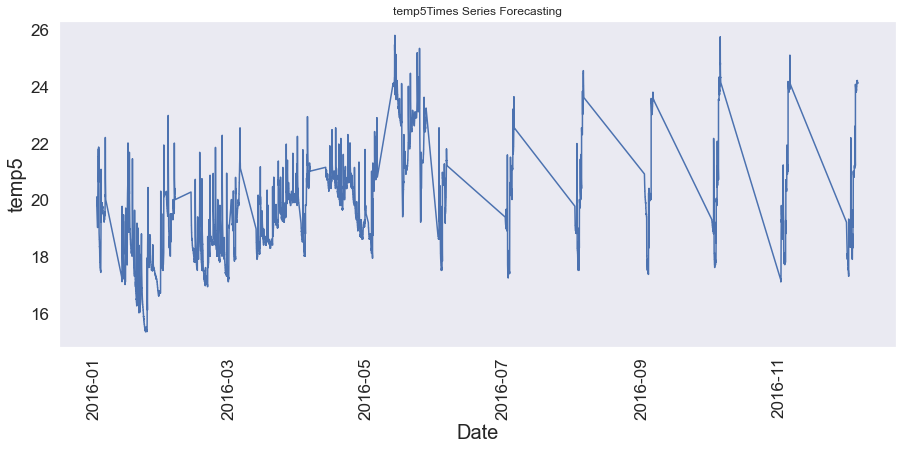

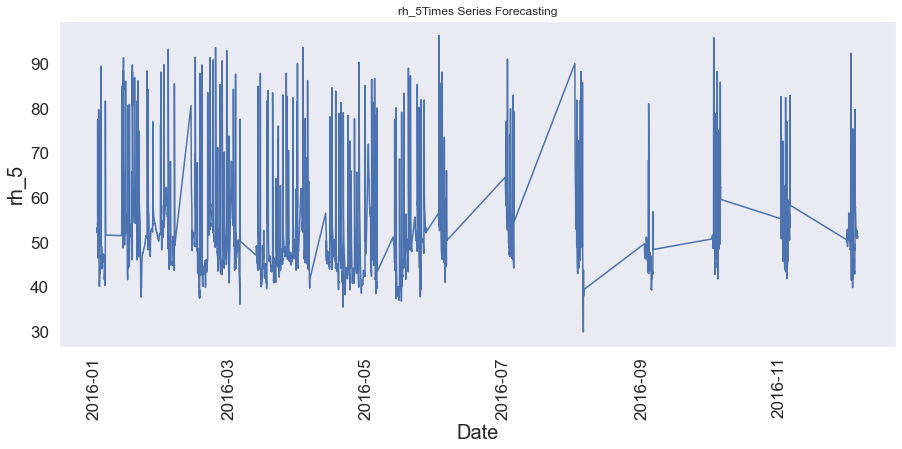

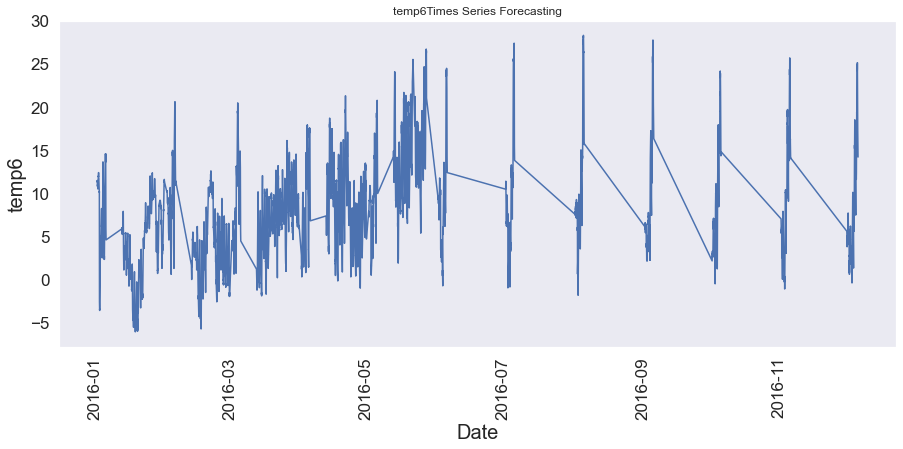

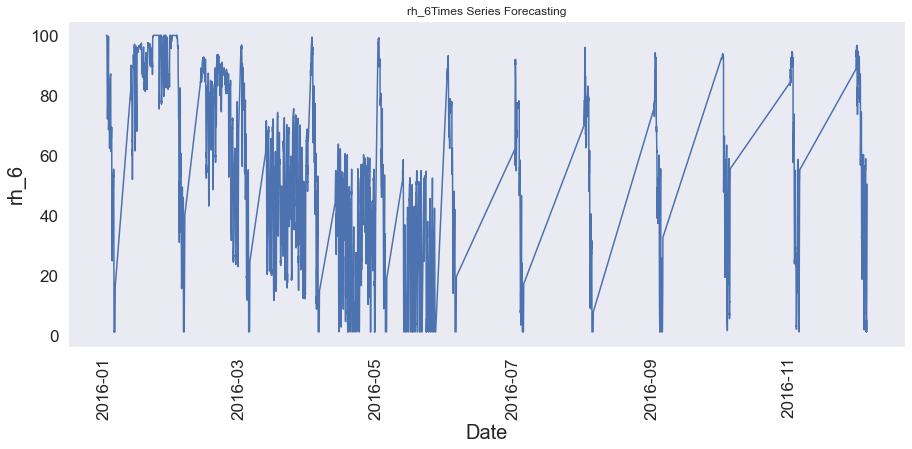

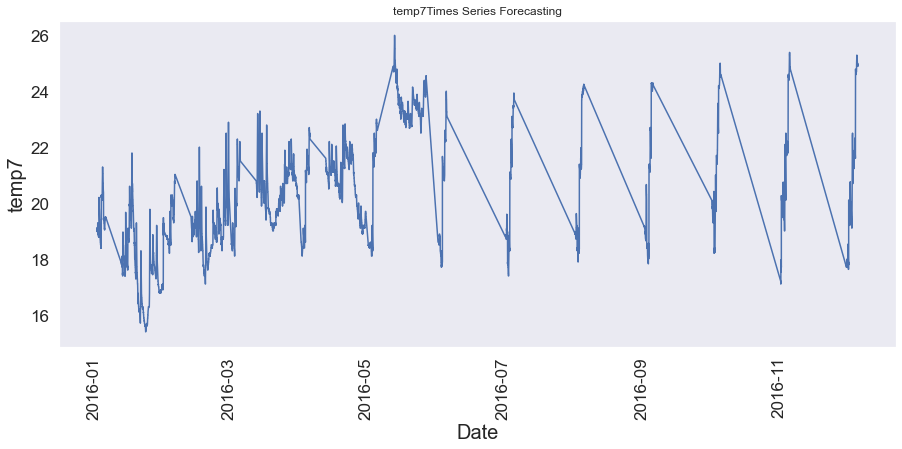

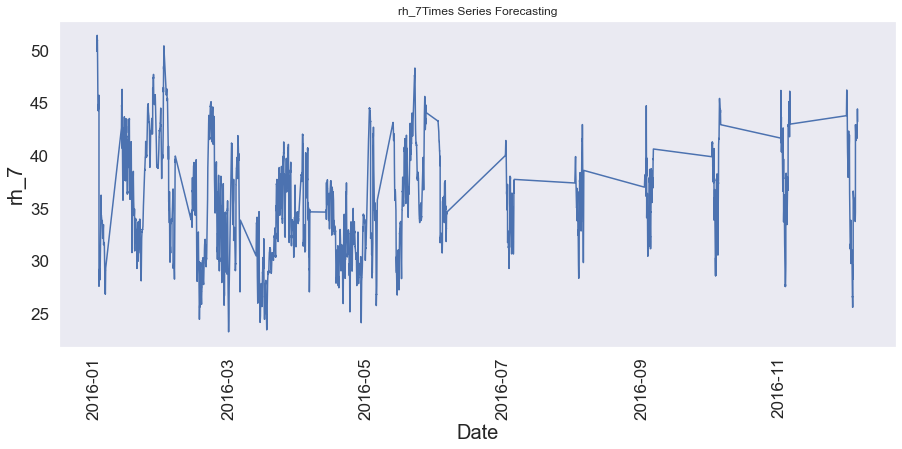

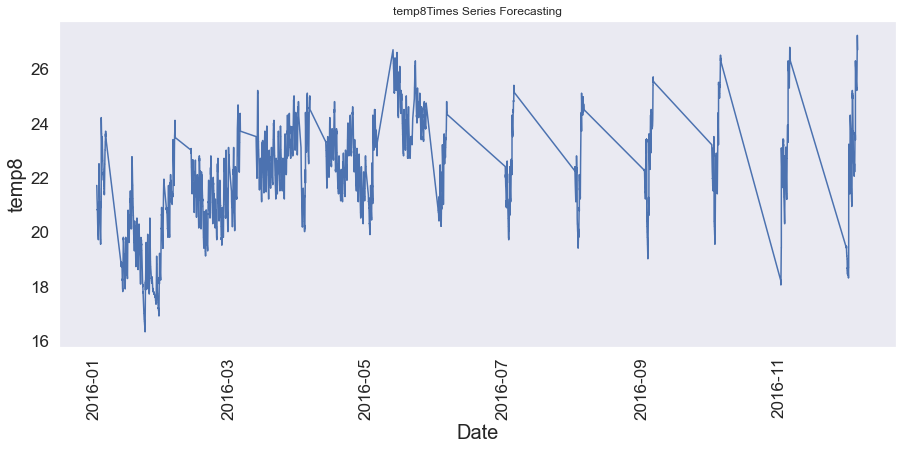

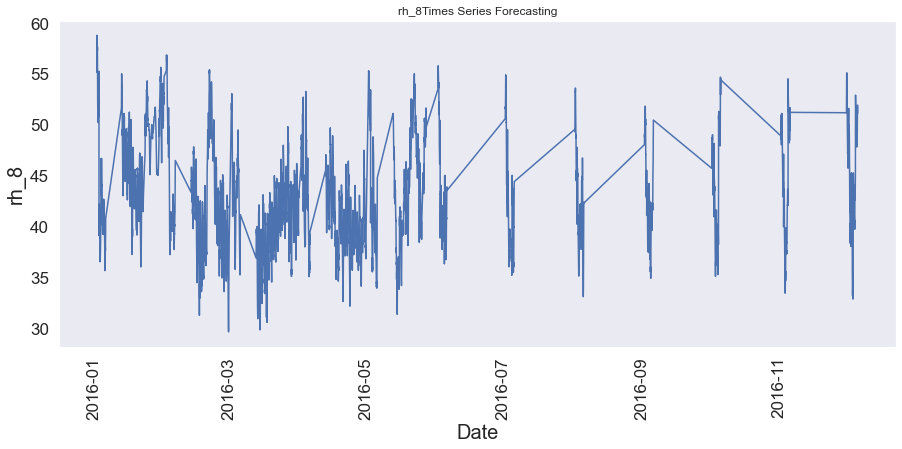

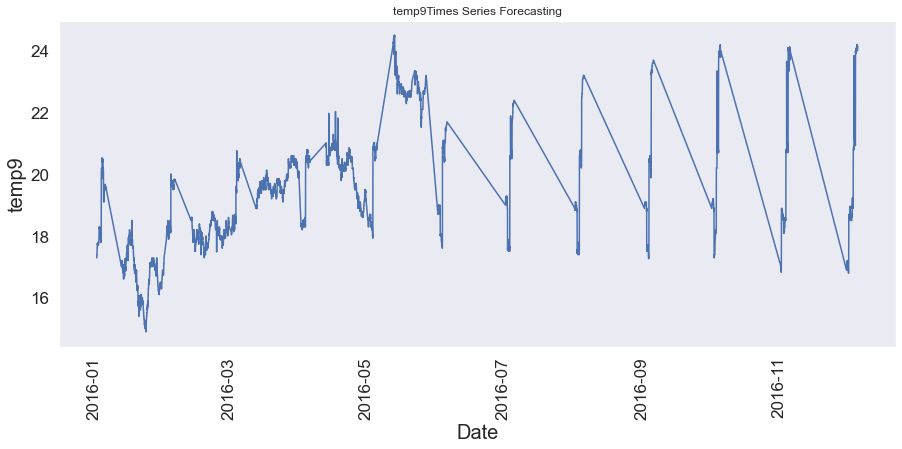

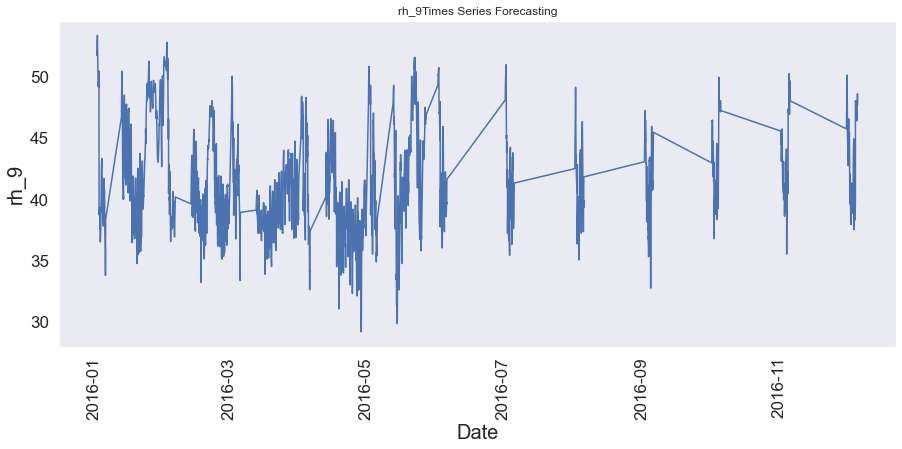

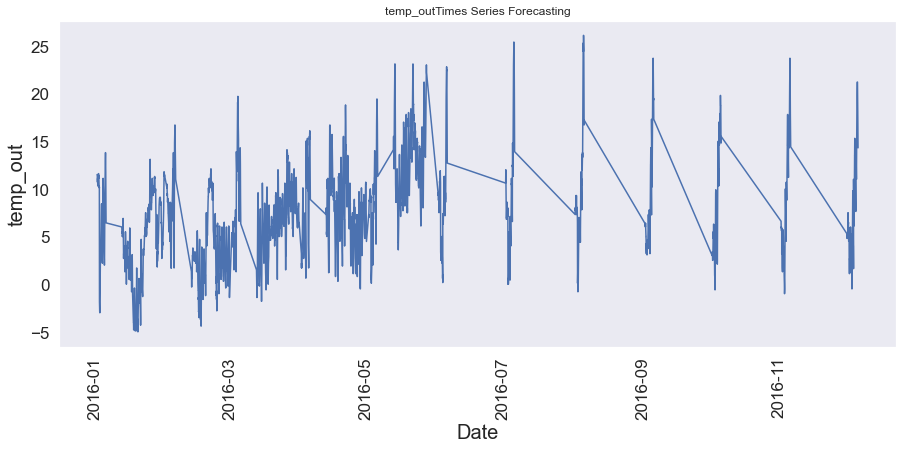

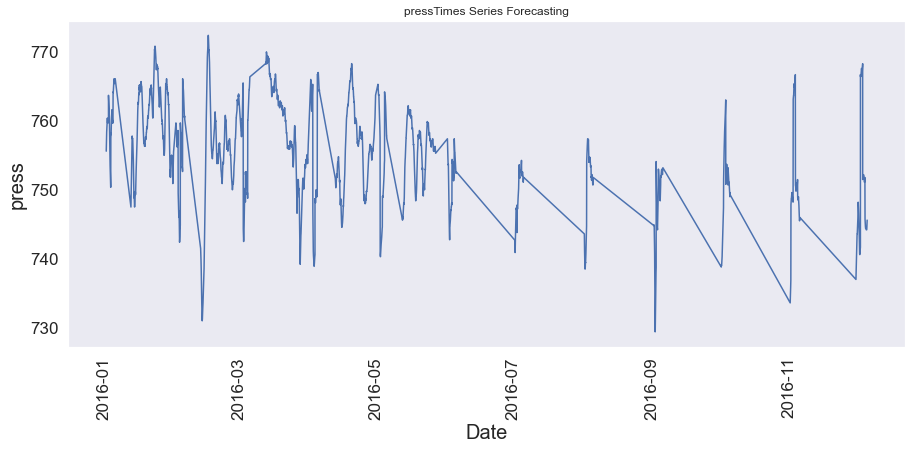

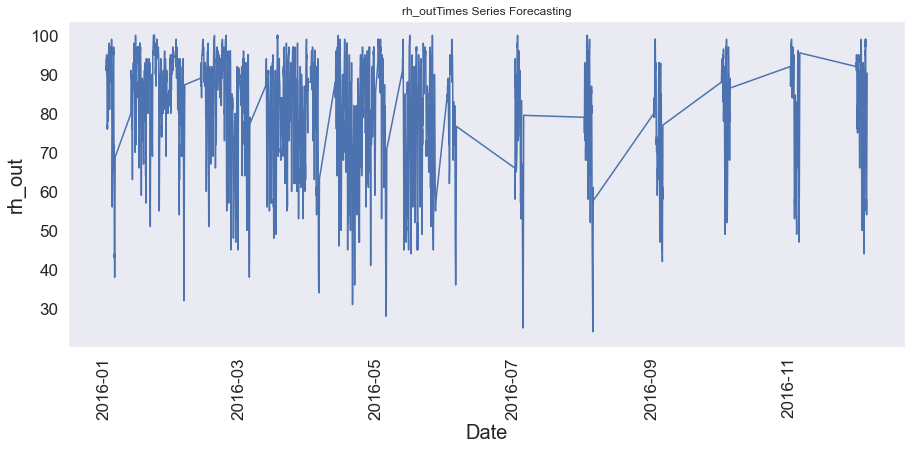

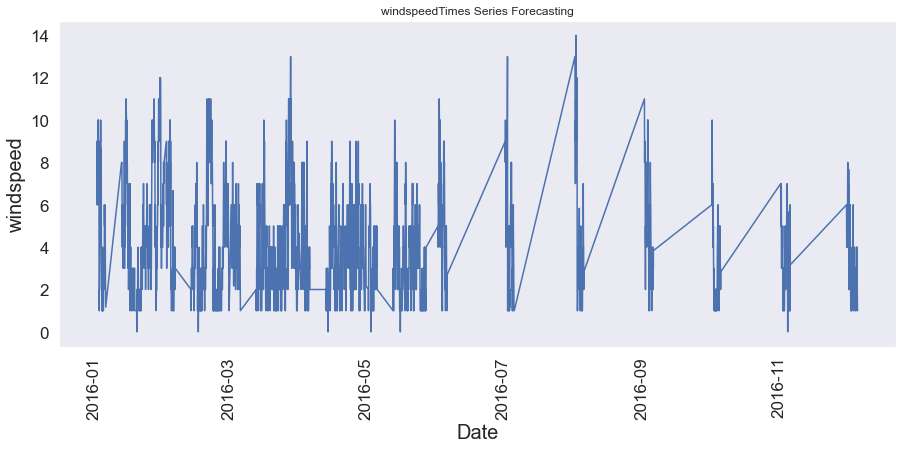

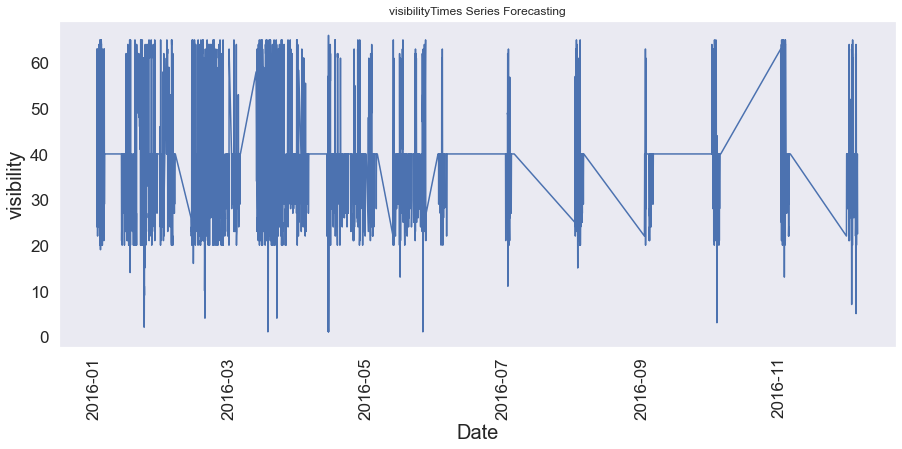

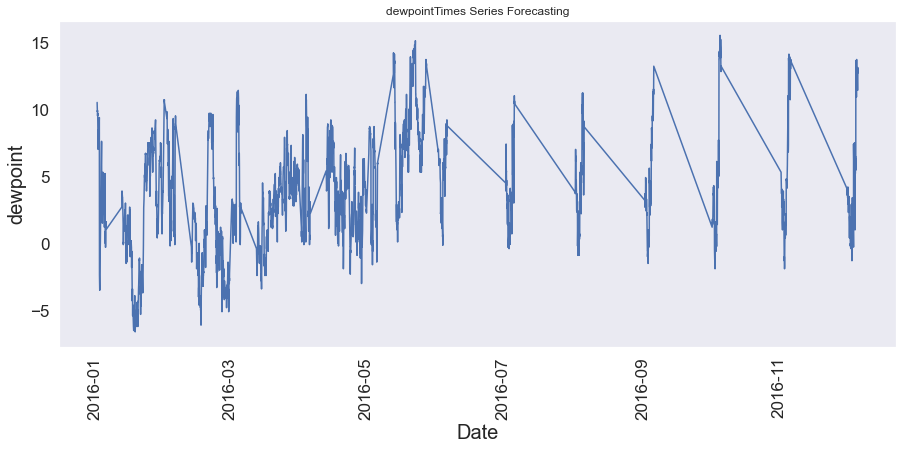

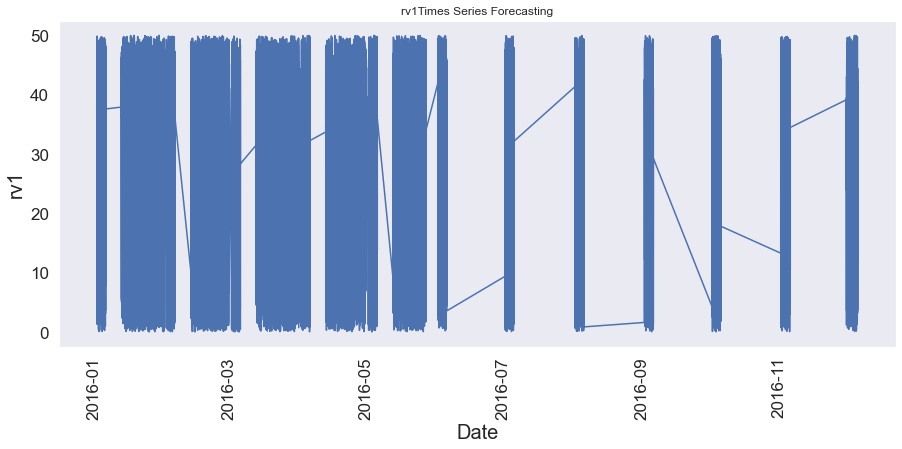

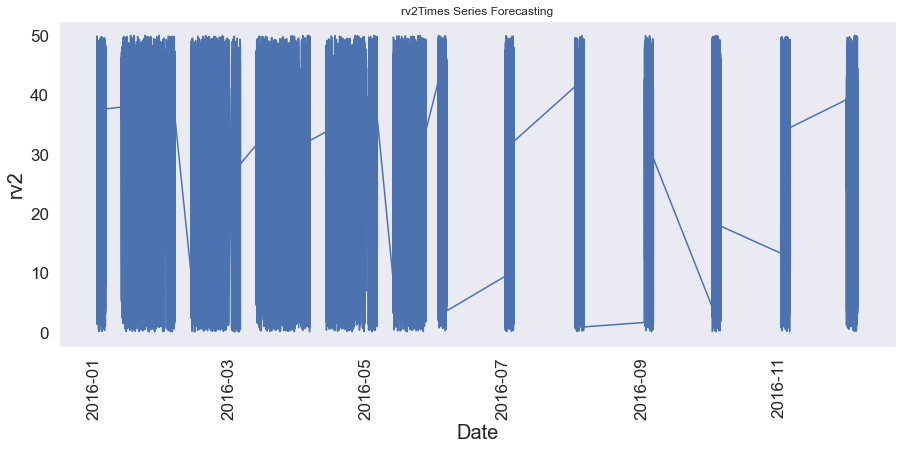

In [18]:
for i in edata.columns[3:]:
    plt.figure(figsize=(15,6))
    sns.lineplot(y=edata[i],x = edata['date'],linewidth = 1.5)
    plt.xlabel ('Date')
    plt.ylabel (i)
    plt.title('{}Times Series Forecasting'.format(i))
    plt.xticks(rotation=90)
    plt.show()

<Figure size 720x720 with 0 Axes>

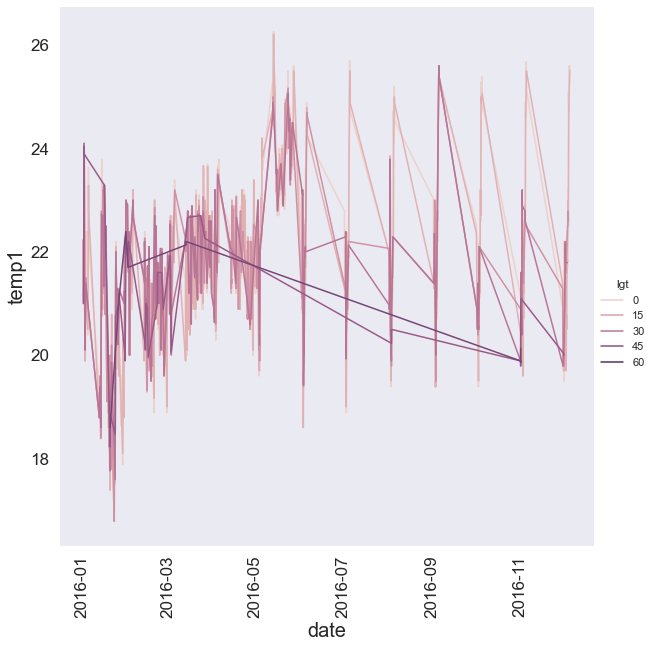

<Figure size 720x720 with 0 Axes>

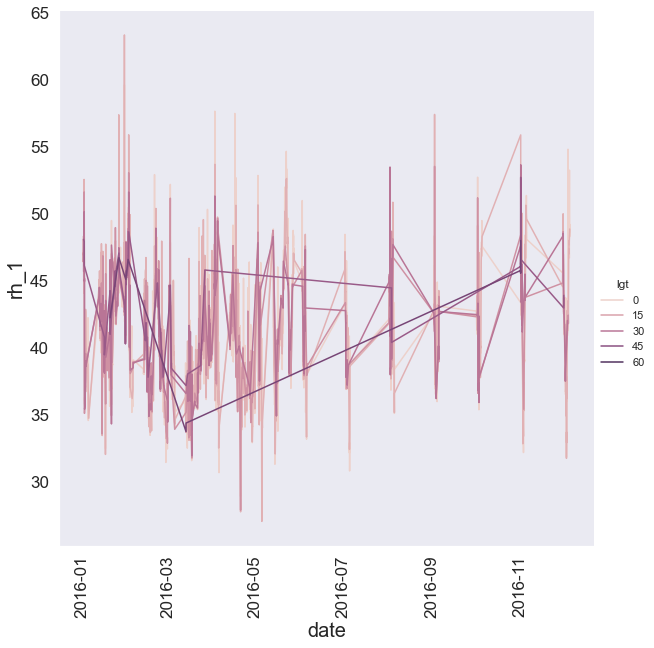

<Figure size 720x720 with 0 Axes>

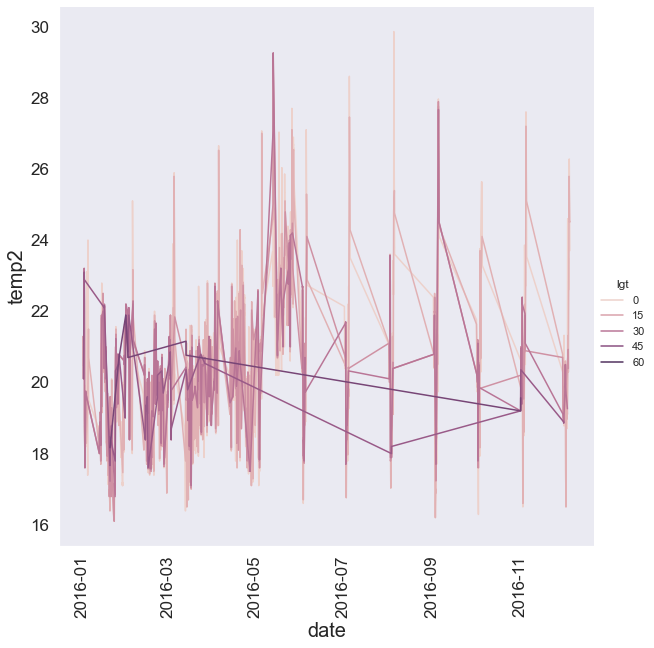

<Figure size 720x720 with 0 Axes>

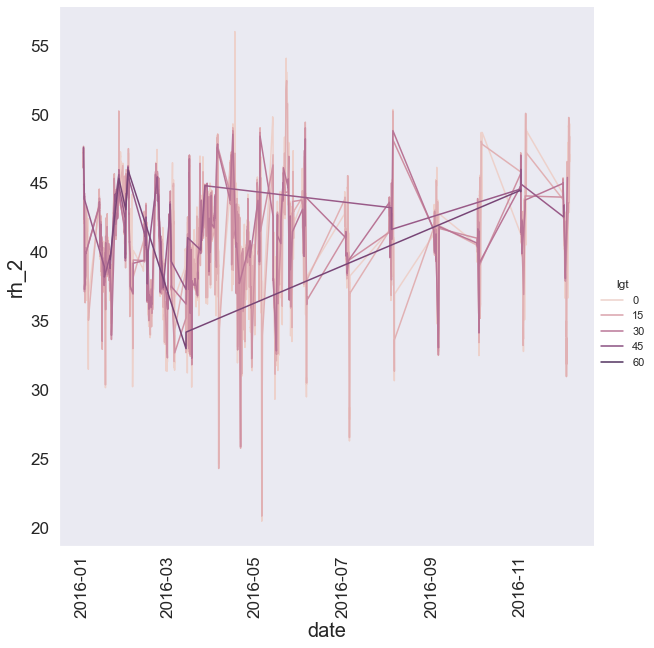

<Figure size 720x720 with 0 Axes>

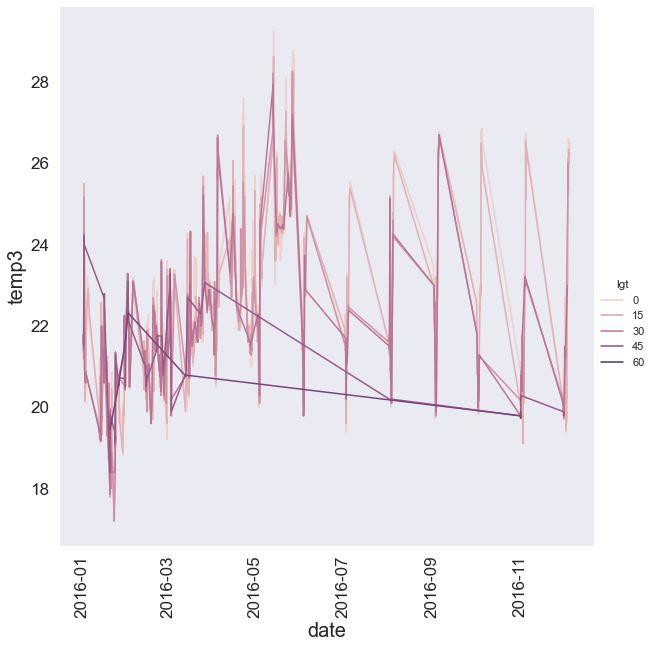

<Figure size 720x720 with 0 Axes>

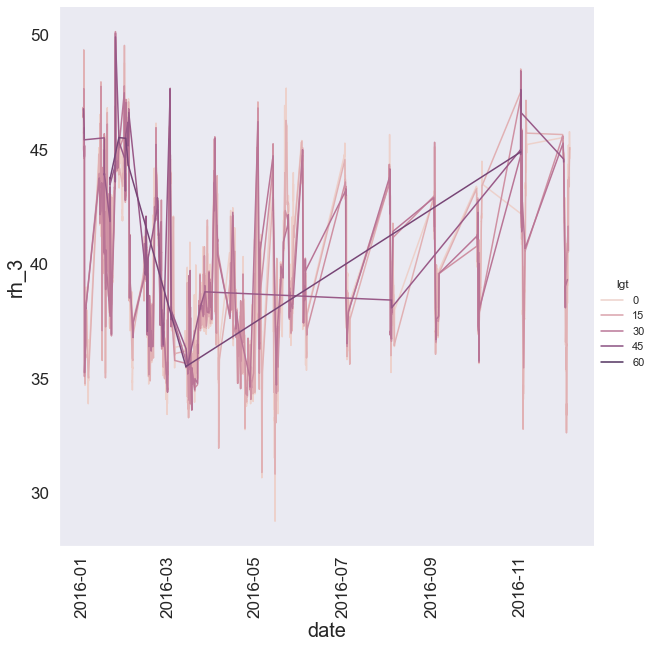

<Figure size 720x720 with 0 Axes>

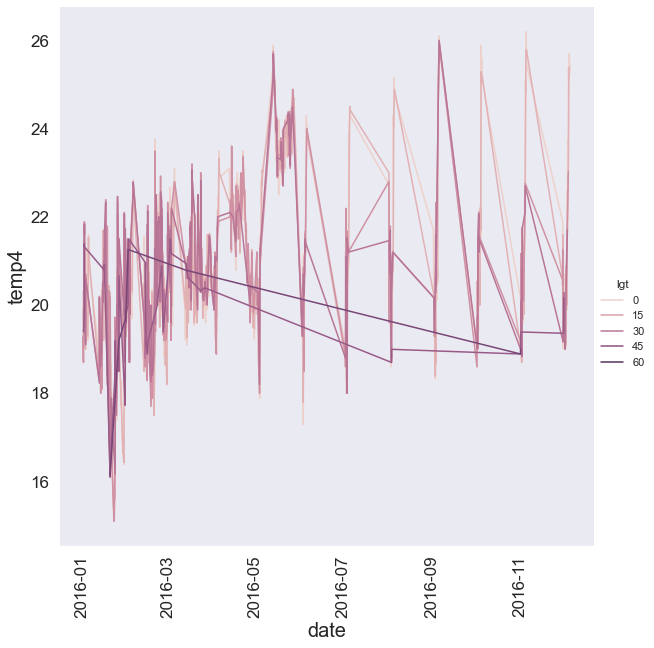

<Figure size 720x720 with 0 Axes>

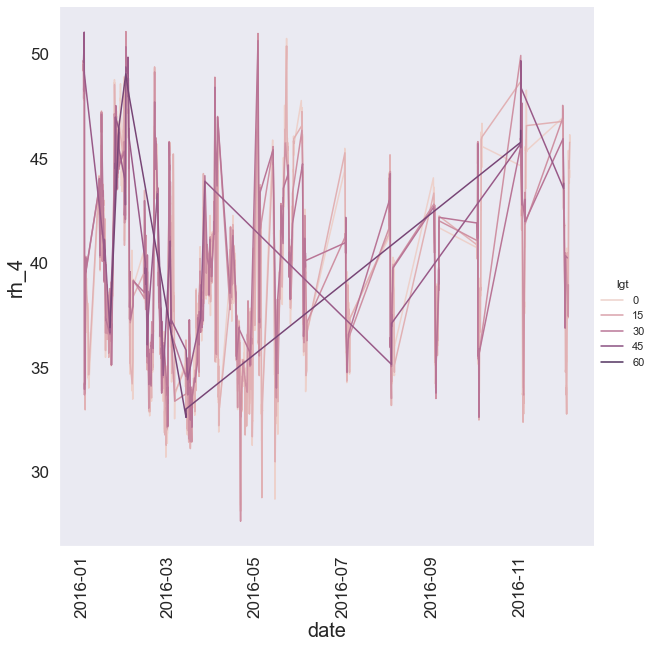

<Figure size 720x720 with 0 Axes>

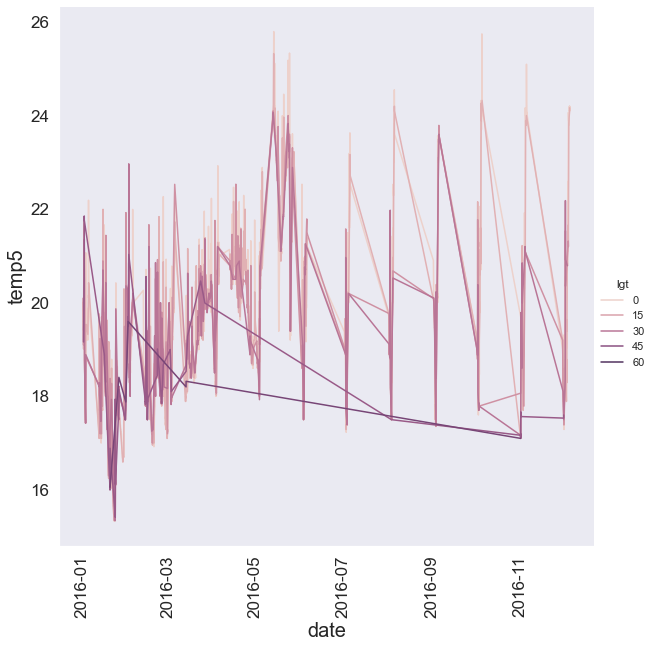

<Figure size 720x720 with 0 Axes>

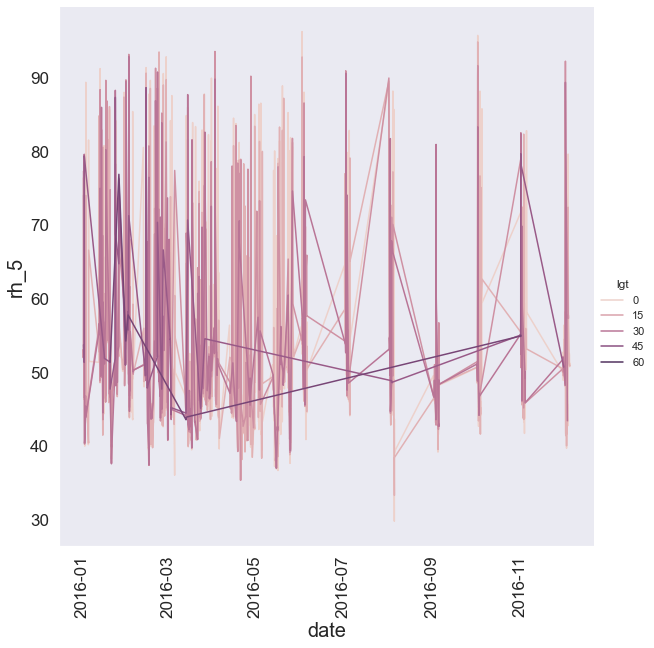

<Figure size 720x720 with 0 Axes>

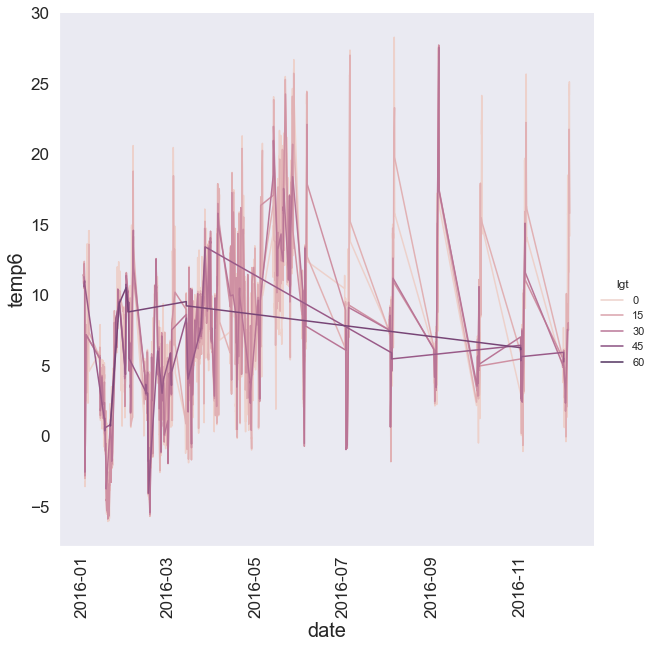

<Figure size 720x720 with 0 Axes>

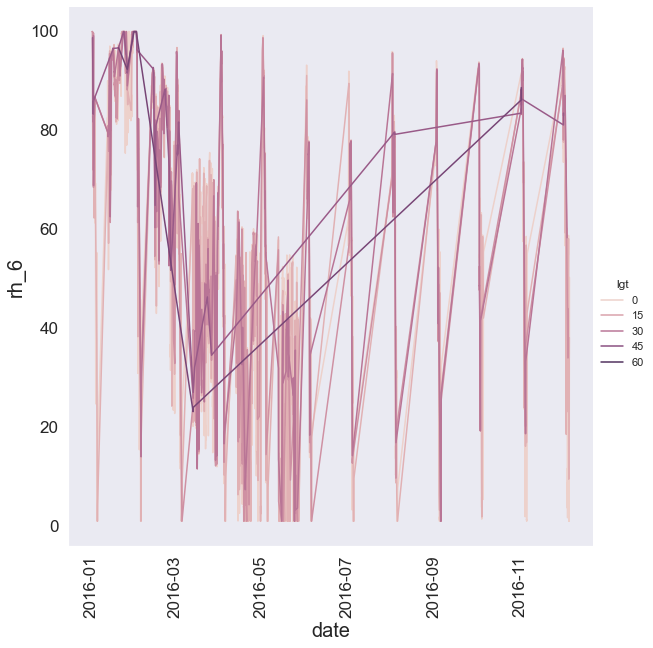

<Figure size 720x720 with 0 Axes>

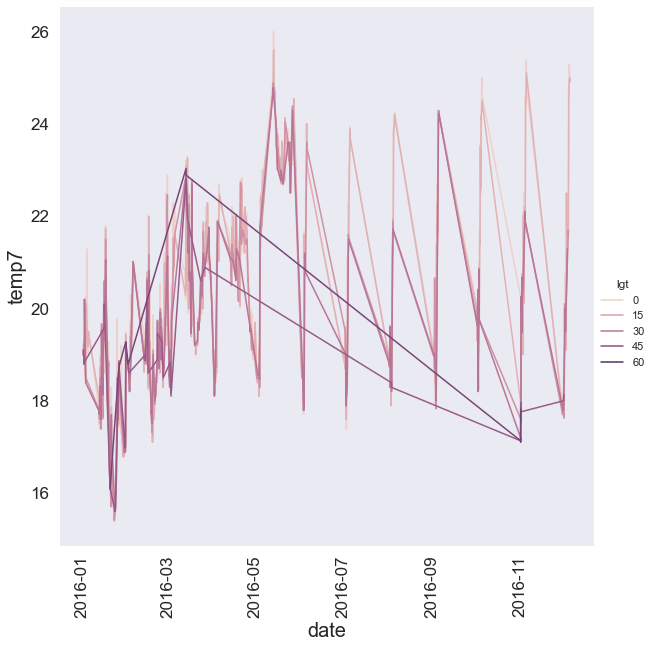

<Figure size 720x720 with 0 Axes>

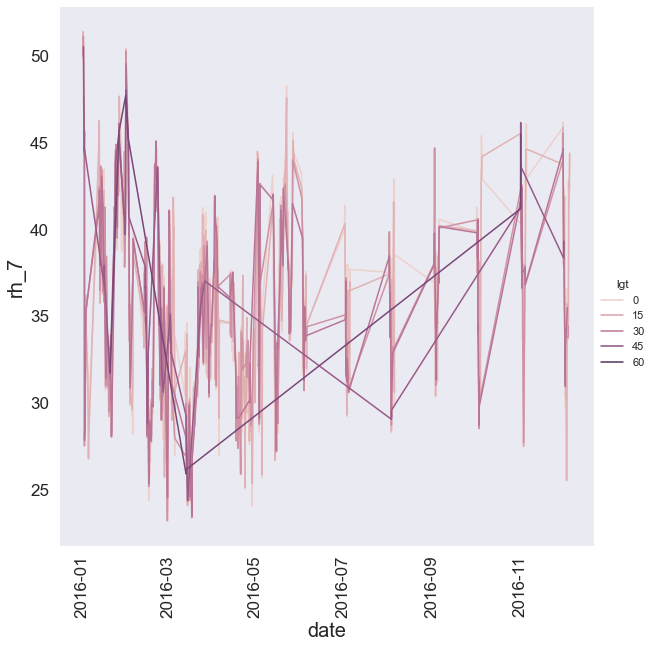

<Figure size 720x720 with 0 Axes>

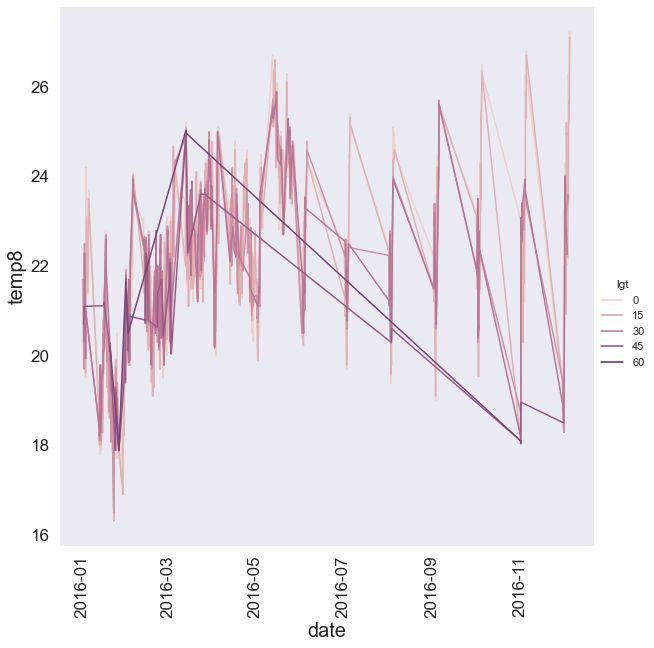

<Figure size 720x720 with 0 Axes>

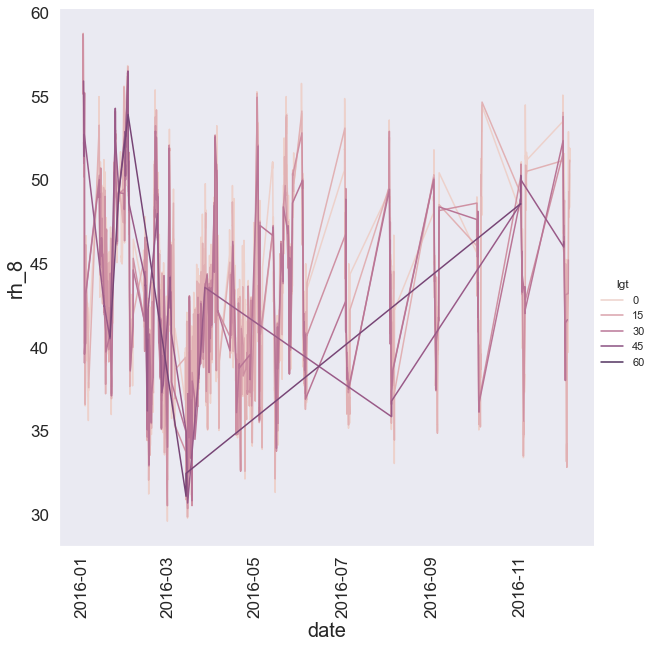

<Figure size 720x720 with 0 Axes>

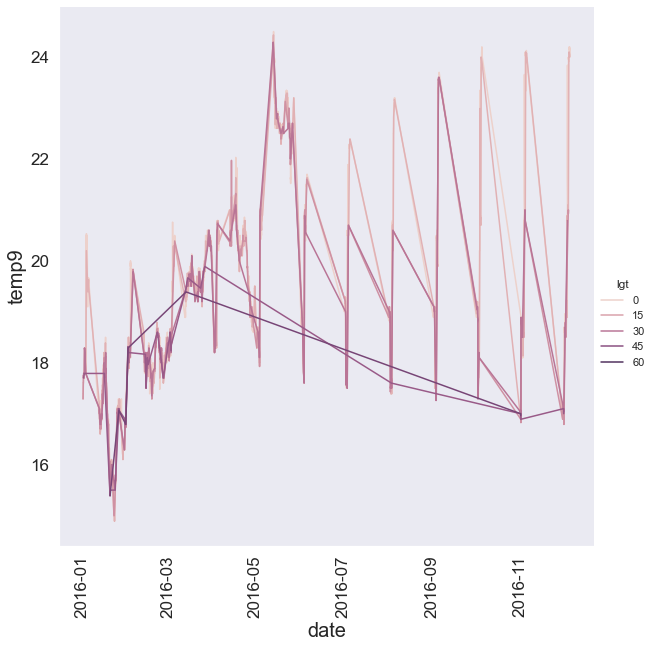

<Figure size 720x720 with 0 Axes>

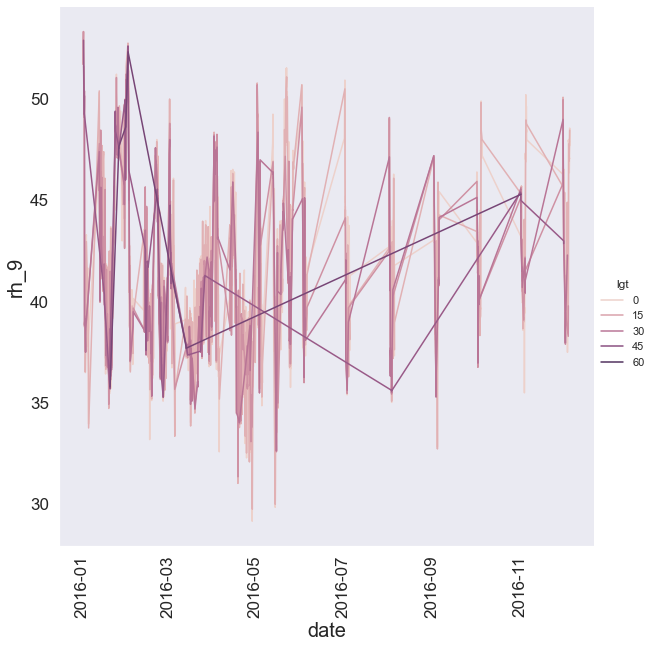

<Figure size 720x720 with 0 Axes>

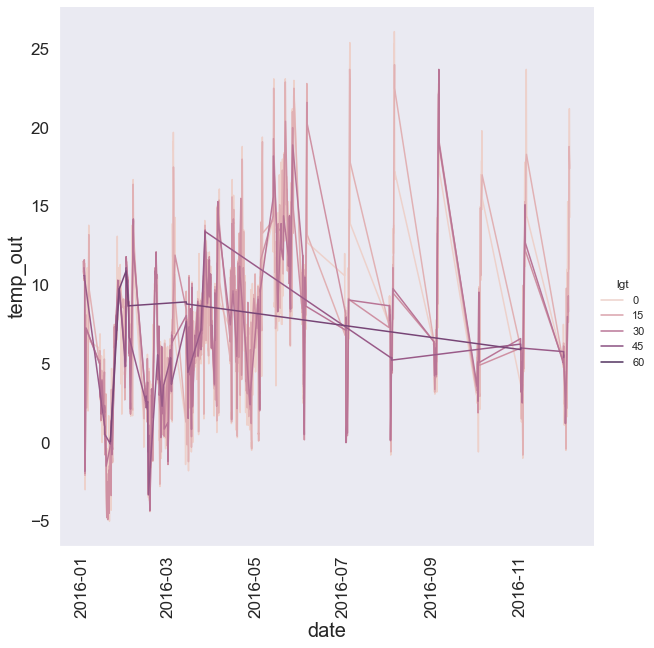

<Figure size 720x720 with 0 Axes>

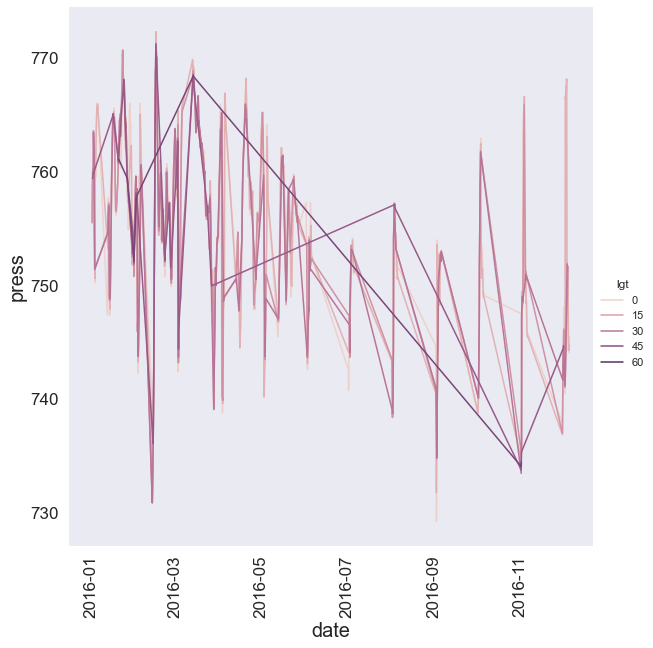

<Figure size 720x720 with 0 Axes>

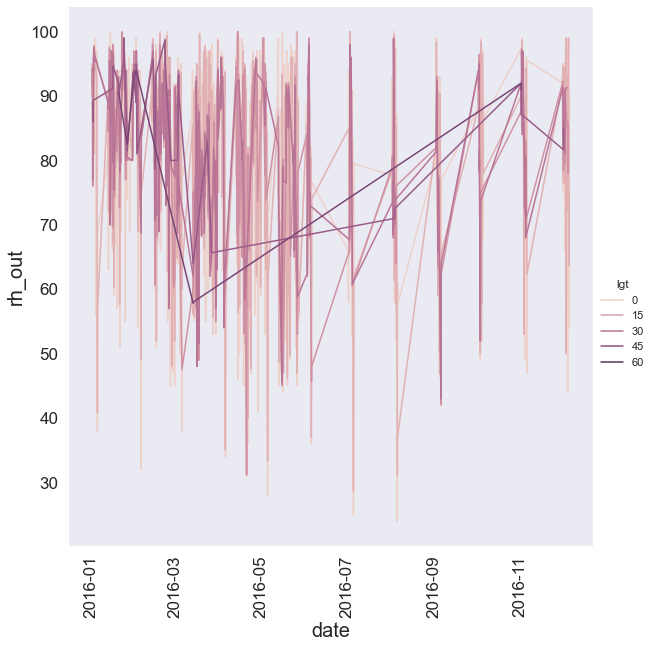

<Figure size 720x720 with 0 Axes>

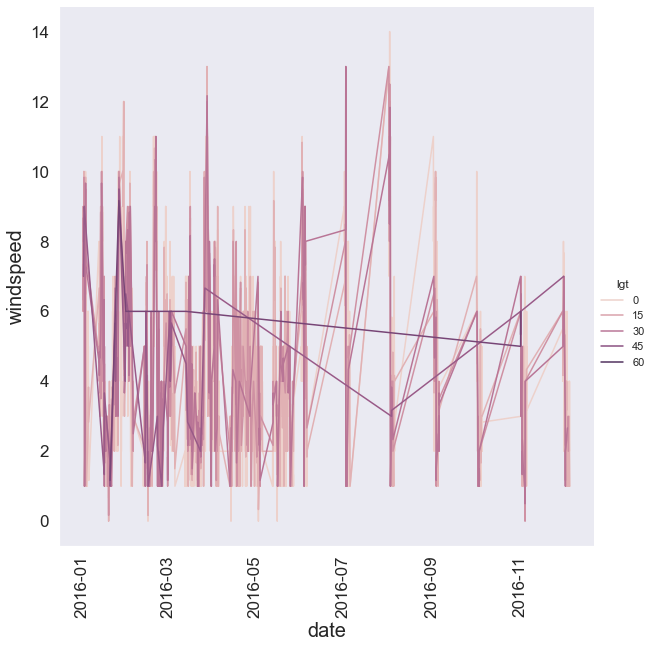

<Figure size 720x720 with 0 Axes>

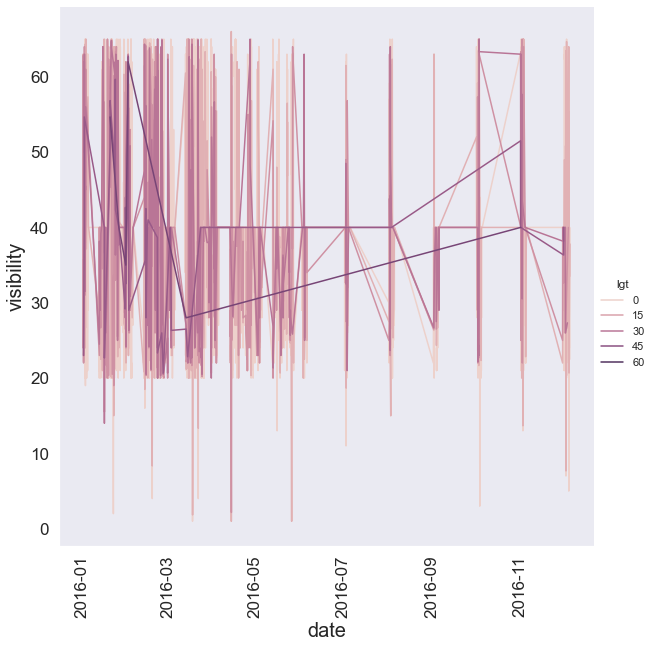

<Figure size 720x720 with 0 Axes>

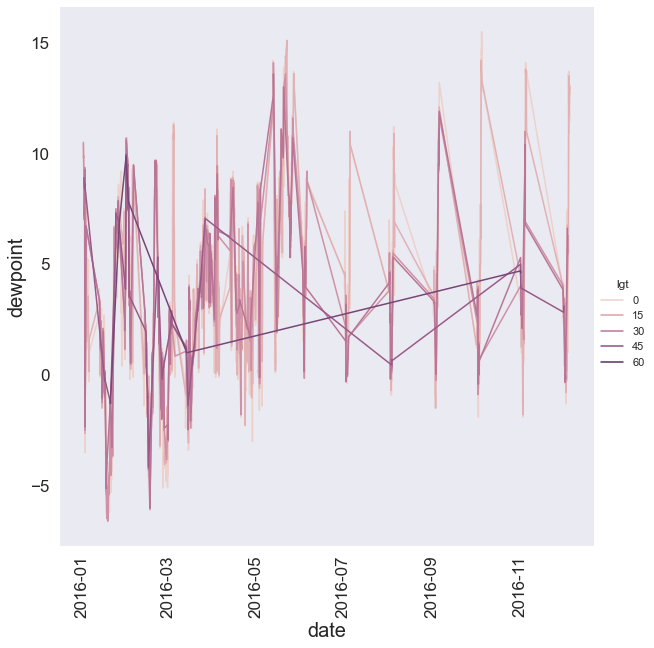

<Figure size 720x720 with 0 Axes>

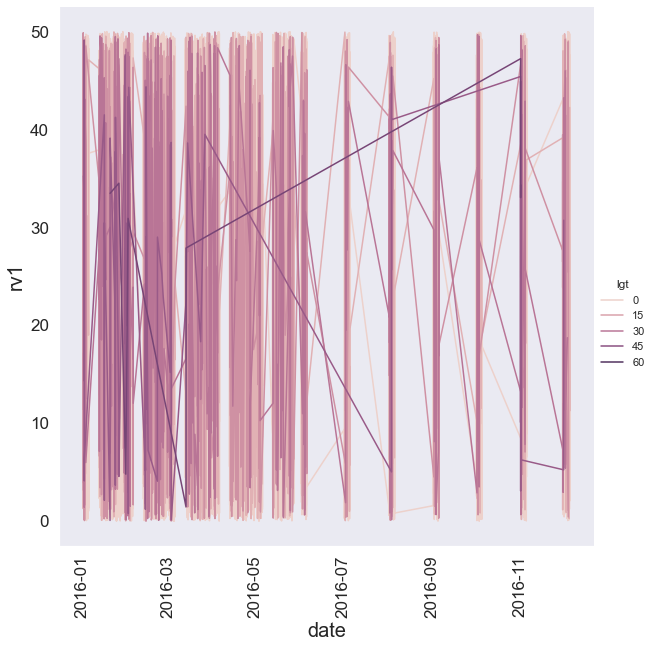

<Figure size 720x720 with 0 Axes>

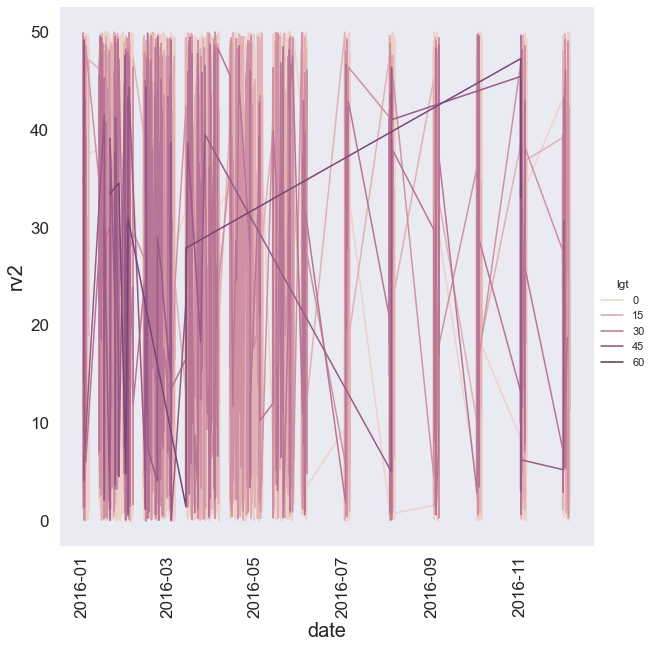

In [19]:
# Combining lineplots using relplot
for i in edata.columns[3:]:
    plt.figure(figsize=(10,10))
    sns.relplot(x="date" , y=i , hue="lgt",kind='line', height=8.5, aspect=1 ,data=edata)
    plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
    plt.show()

Window Functions
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

Rolling - Same size and sliding

Expanding - Contains all prior values

In [19]:
edata.set_index("date", inplace = True)

In [20]:
edata.head()

appl  lgt  temp1       rh_1  temp2       rh_2  temp3  \
date                                                                        
2016-11-01 17:00:00    60   30  19.89  47.596667   19.2  44.790000  19.79   
2016-11-01 17:10:00    60   30  19.89  46.693333   19.2  44.722500  19.79   
2016-11-01 17:20:00    50   30  19.89  46.300000   19.2  44.626667  19.79   
2016-11-01 17:30:00    50   40  19.89  46.066667   19.2  44.590000  19.79   
2016-11-01 17:40:00    60   40  19.89  46.333333   19.2  44.530000  19.79   

                          rh_3      temp4       rh_4  ...      temp9   rh_9  \
date                                                  ...                     
2016-11-01 17:00:00  44.730000  19.000000  45.566667  ...  17.033333  45.53   
2016-11-01 17:10:00  44.790000  19.000000  45.992500  ...  17.066667  45.56   
2016-11-01 17:20:00  44.933333  18.926667  45.890000  ...  17.000000  45.50   
2016-11-01 17:30:00  45.000000  18.890000  45.723333  ...  17.000000  45.40   
2016-11-01 17:40:00  45.000000  18.890000  45.530000  ...  17.000000  45.40   

                     temp_out  press  rh_out  windspeed  visibility  dewpoint  \
date                                                                            
2016-11-01 17:00:00      6.60  733.5    92.0   7.000000   63.000000       5.3   
2016-11-01 17:10:00      6.48  733.6    92.0   6.666667   59.166667       5.2   
2016-11-01 17:20:00      6.37  733.7    92.0   6.333333   55.333333       5.1   
2016-11-01 17:30:00      6.25  733.8    92.0   6.000000   51.500000       5.0   
2016-11-01 17:40:00      6.13  733.9    92.0   5.666667   47.666667       4.9   

                           rv1        rv2  
date                                       
2016-11-01 17:00:00  13.275433  13.275433  
2016-11-01 17:10:00  18.606195  18.606195  
2016-11-01 17:20:00  28.642668  28.642668  
2016-11-01 17:30:00  45.410390  45.410390  
2016-11-01 17:40:00  10.084097  10.084097  

[5 rows x 28 columns]

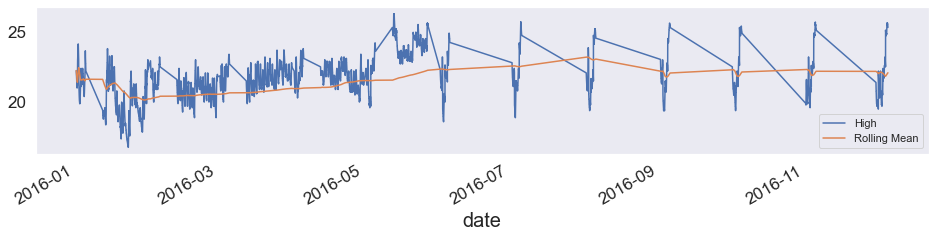

In [21]:
# Rolling window functions
edata.sort_index(inplace = True)
rolling_temp1 = edata['temp1'].rolling('90D').mean()
edata['temp1'].plot()
rolling_temp1.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

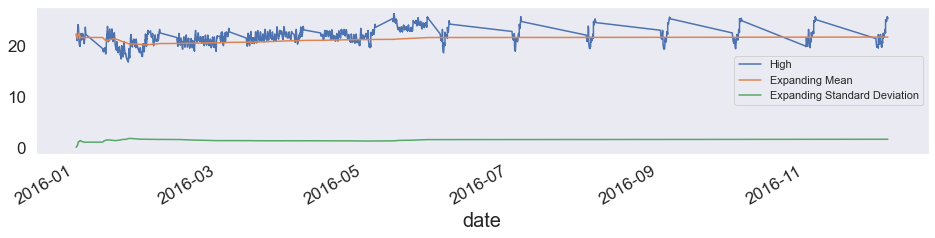

In [22]:
temp1_mean = edata.temp1.expanding().mean()
temp1_std = edata.temp1.expanding().std()
edata.temp1.plot()
temp1_mean.plot()
temp1_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

Trend, Seasonality and Noise
These are the components of a time series

<AxesSubplot:xlabel='date'>

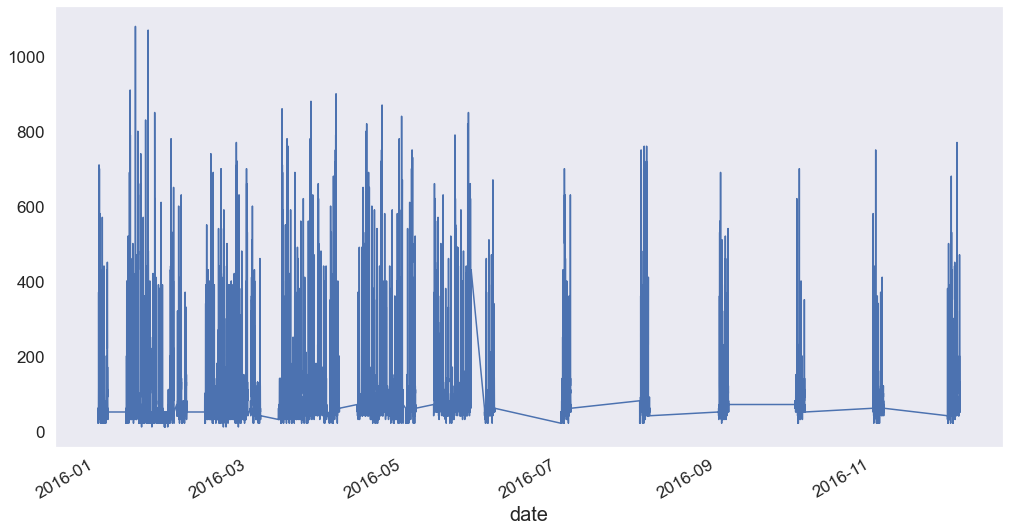

In [23]:
edata['appl'].plot(figsize=(17,9))

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import statsmodels.api as sm

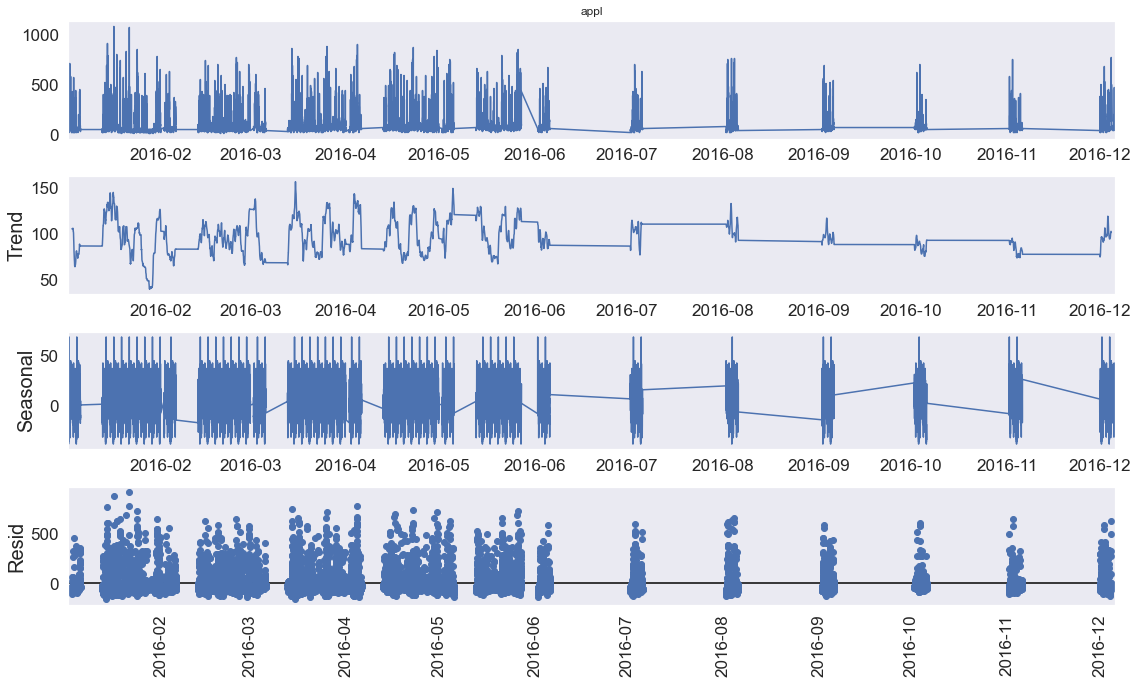

In [25]:
# Now, for decomposition...
mpl.rcParams['figure.figsize'] = (16, 9)
decomposed_appl_volume = sm.tsa.seasonal_decompose(edata['appl'],freq=360) # The frequncy is annual
figure = decomposed_appl_volume.plot()
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

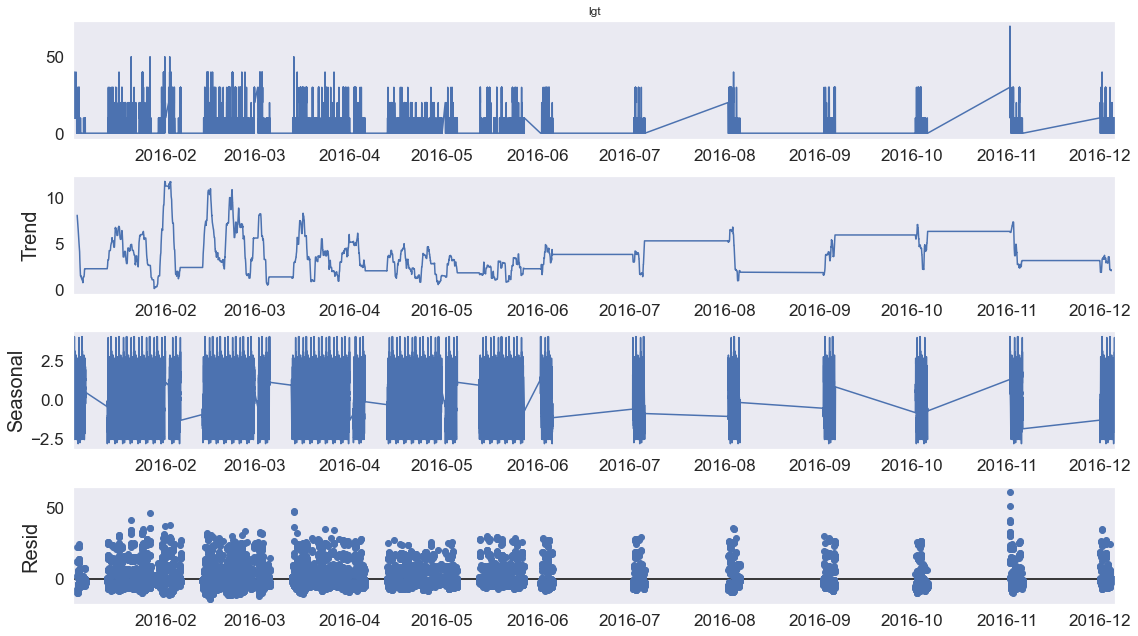

In [28]:
# Now, for decomposition...

mpl.rcParams['figure.figsize'] = (16, 9)
decomposed_Lgt_volume = sm.tsa.seasonal_decompose(edata['lgt'],freq=360) # The frequncy is annual
figure = decomposed_Lgt_volume.plot()
#plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

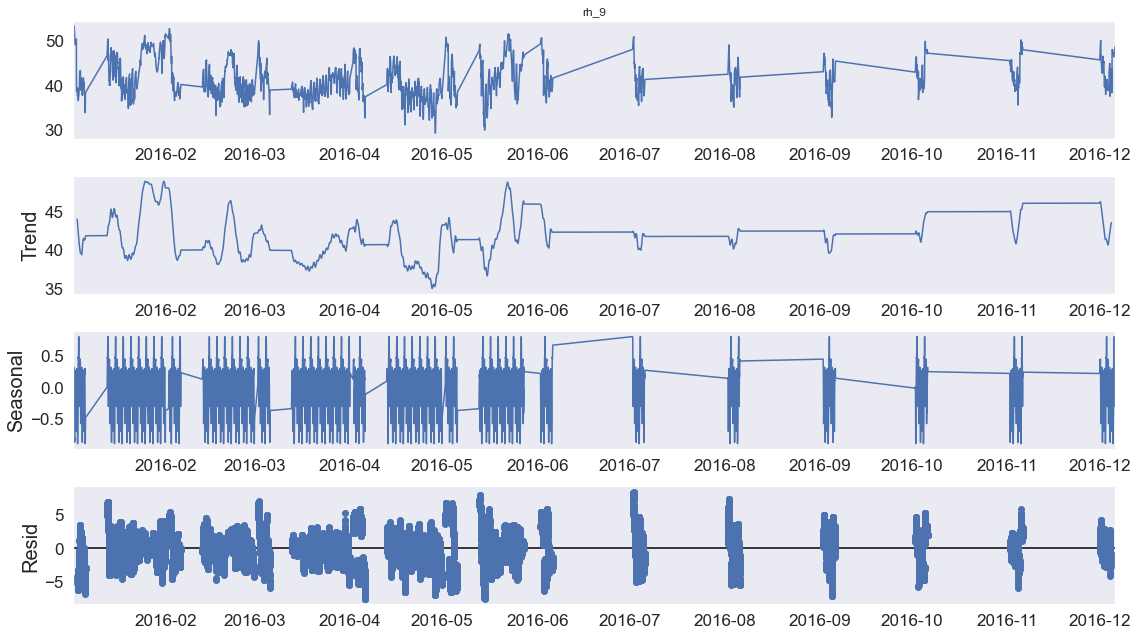

In [29]:
# Now, for decomposition...
#plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
mpl.rcParams['figure.figsize'] = (16, 9)
decomposed_rh_9_volume = sm.tsa.seasonal_decompose(edata['rh_9'],freq=360) # The frequncy is annual
figure = decomposed_rh_9_volume.plot()
plt.show()

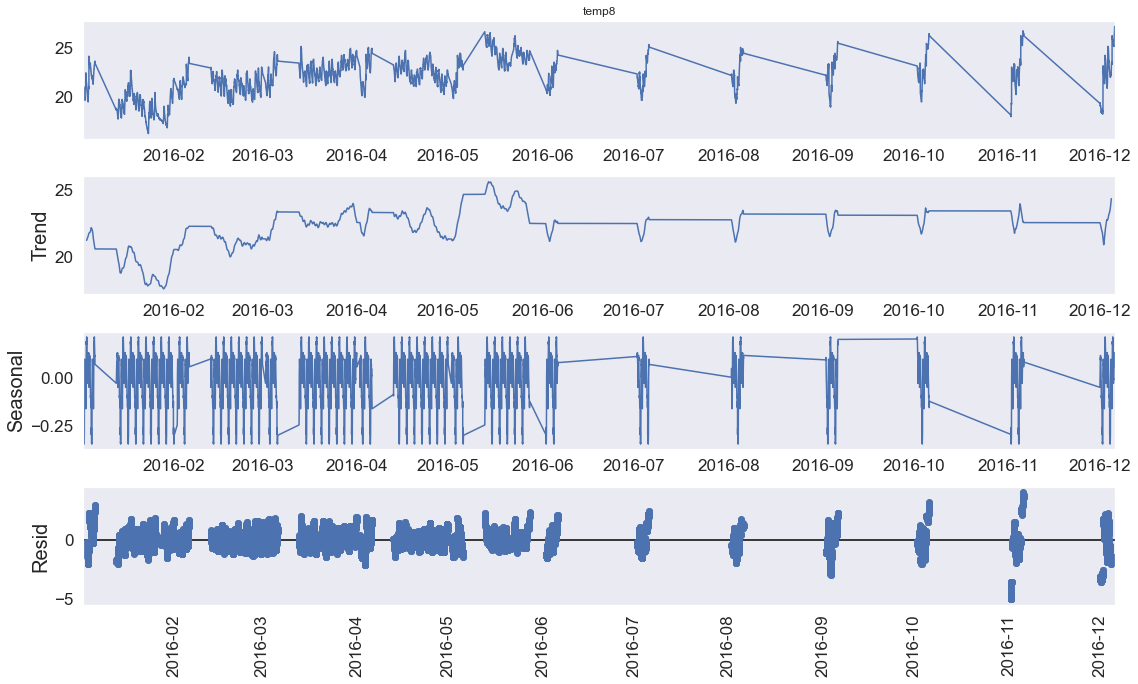

In [30]:
# Now, for decomposition...
mpl.rcParams['figure.figsize'] = (16, 9)
decomposed_temp8_volume = sm.tsa.seasonal_decompose(edata['temp8'],freq=360) # The frequncy is annual
figure = decomposed_temp8_volume.plot()
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

<AxesSubplot:xlabel='date'>

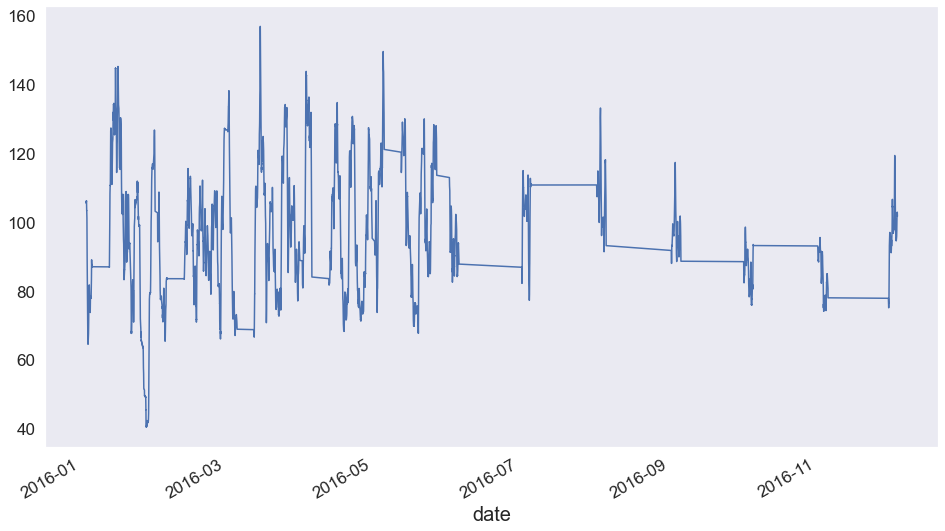

In [31]:
decomposed_appl_volume.trend.plot()

<AxesSubplot:xlabel='date'>

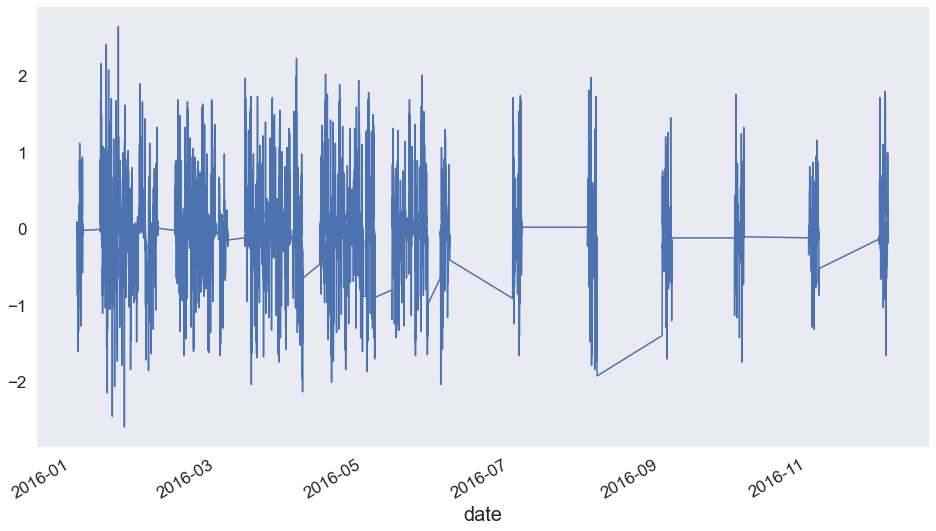

In [32]:
decomposed_appl_volume.trend.diff().plot()

Autoregreesive models

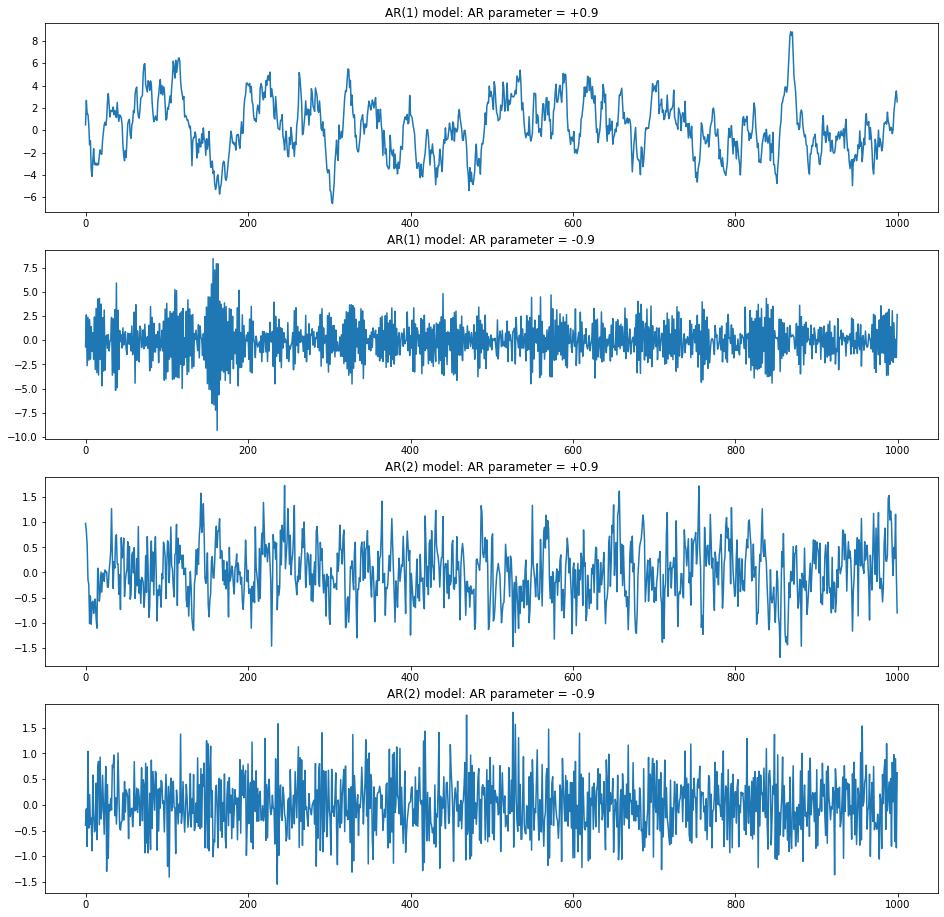

In [29]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 16
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

Forecasting a model

In [30]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1403.542
Method:                       css-mle   S.D. of innovations              0.984
Date:                Mon, 25 Jul 2022   AIC                           2813.083
Time:                        15:49:10   BIC                           2827.806
Sample:                             0   HQIC                          2818.679
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3067      0.379      0.810      0.418      -0.435       1.049
ar.L1.y        0.9188      0.012     74.217      0.000       0.894       0.943
                                    Roots           

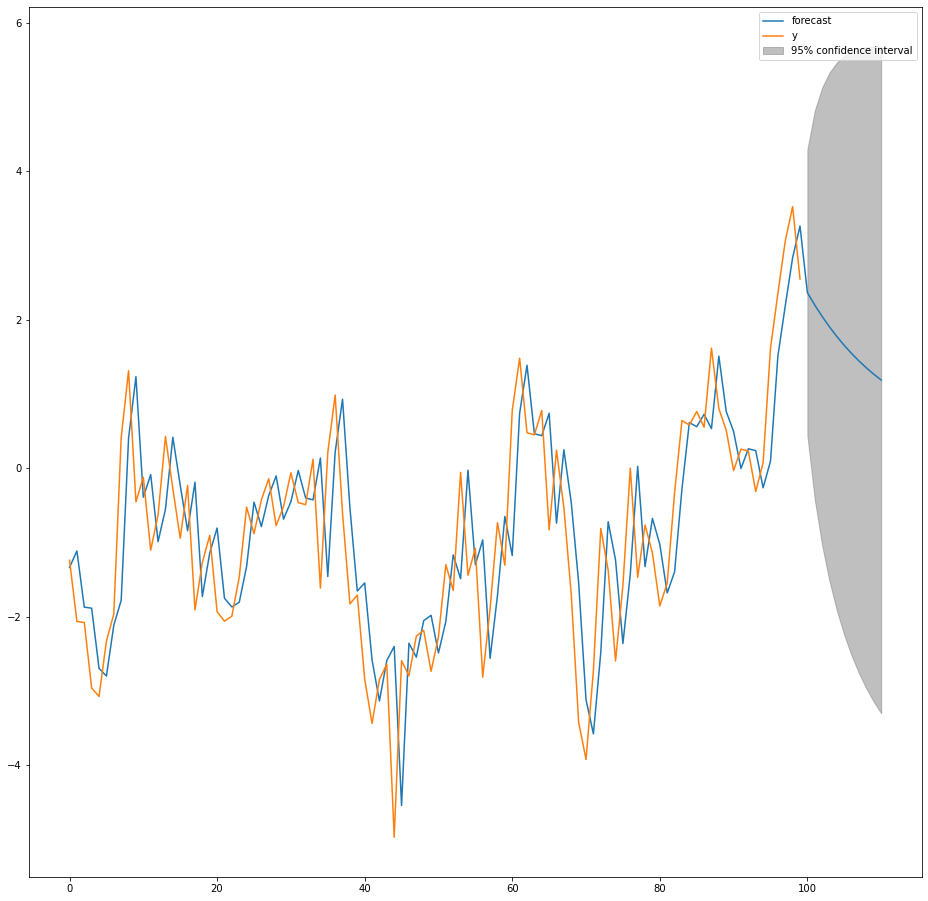

In [31]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [32]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.9599010412687631.


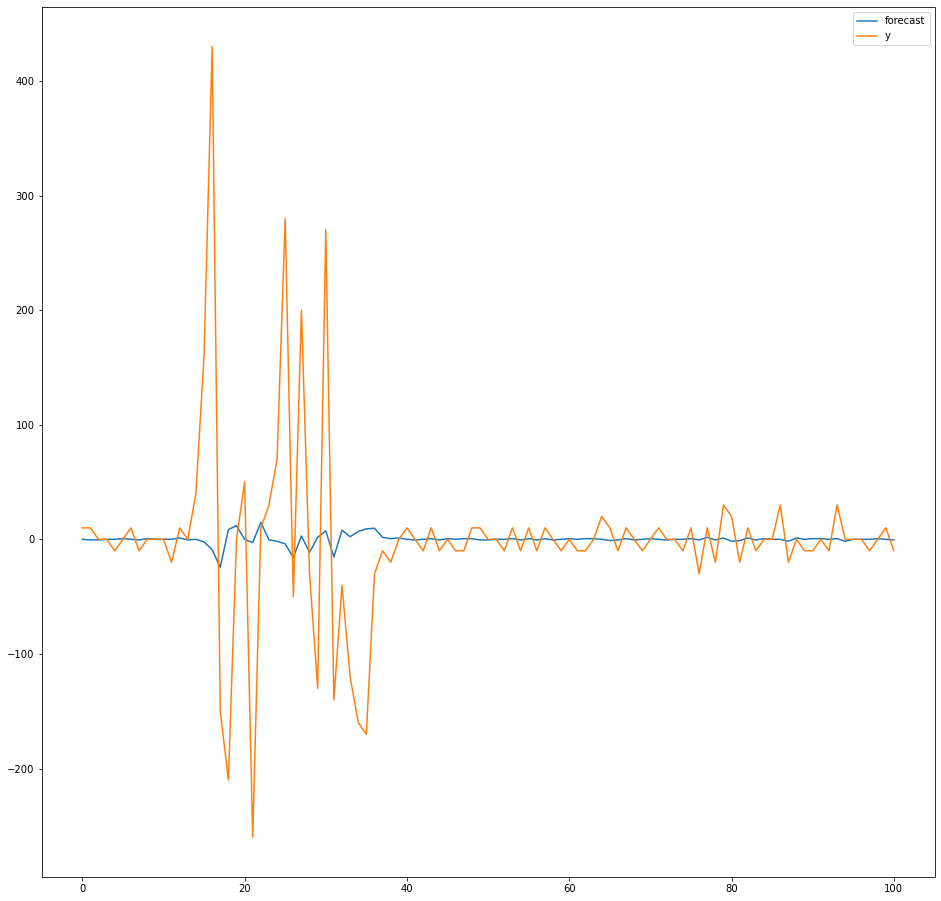

In [35]:
appl = ARMA(edata['appl'].diff().iloc[1:].values, order=(1,0))
res = appl.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [37]:
rmse = math.sqrt(mean_squared_error(edata['appl'].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 81.28287771263986.


moving-average (MA)

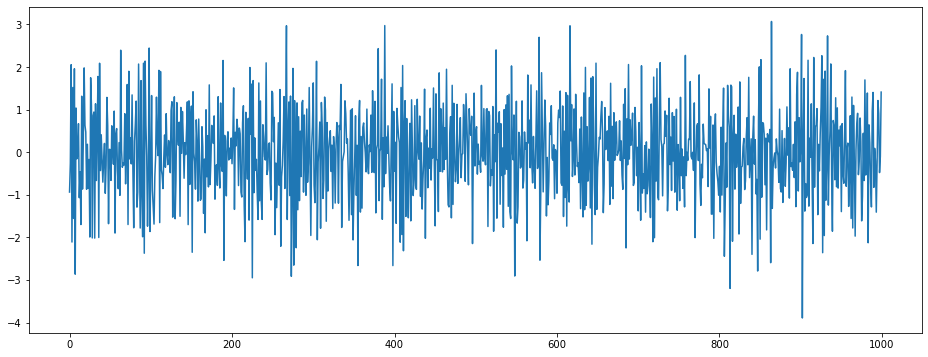

In [38]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

##Forecasting the simulated MA model

In [40]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1408.511
Method:                       css-mle   S.D. of innovations              0.990
Date:                Mon, 25 Jul 2022   AIC                           2823.021
Time:                        15:57:18   BIC                           2837.745
Sample:                             0   HQIC                          2828.617
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0146      0.017     -0.882      0.378      -0.047       0.018
ma.L1.y       -0.4723      0.027    -17.659      0.000      -0.525      -0.420
                                    Roots           

##Prediction using MA models

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                19734
Model:                     ARMA(0, 3)   Log Likelihood             -110889.198
Method:                       css-mle   S.D. of innovations             66.702
Date:                Mon, 25 Jul 2022   AIC                         221788.397
Time:                        16:01:55   BIC                         221827.847
Sample:                             0   HQIC                        221801.312
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.125      0.056      0.956      -0.237       0.251
ma.L1.y       -0.1949      0.007    -28.119      0.000      -0.208      -0.181
ma.L2.y       -0.3713      0.007    -52.526      0.0

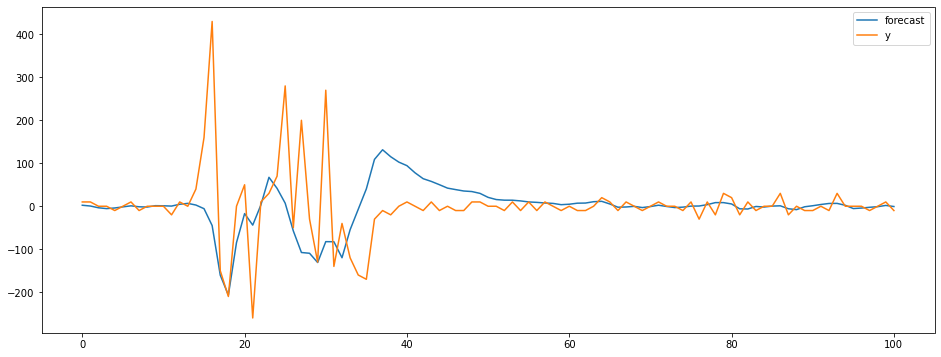

In [42]:
# Forecasting and predicting Appliances_energy
model = ARMA(edata['appl'].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()


In [43]:
rmse = math.sqrt(mean_squared_error(edata['appl'].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 103.37651508236648.


##ARMA(1,1) model

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                19734
Model:                     ARMA(3, 3)   Log Likelihood             -110820.335
Method:                       css-mle   S.D. of innovations             66.470
Date:                Mon, 25 Jul 2022   AIC                         221656.670
Time:                        16:09:41   BIC                         221719.791
Sample:                             0   HQIC                        221677.335
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0051      0.096      0.054      0.957      -0.182       0.193
ar.L1.y        0.7121      0.162      4.396      0.000       0.395       1.030
ar.L2.y       -0.1991      0.089     -2.237      0.0

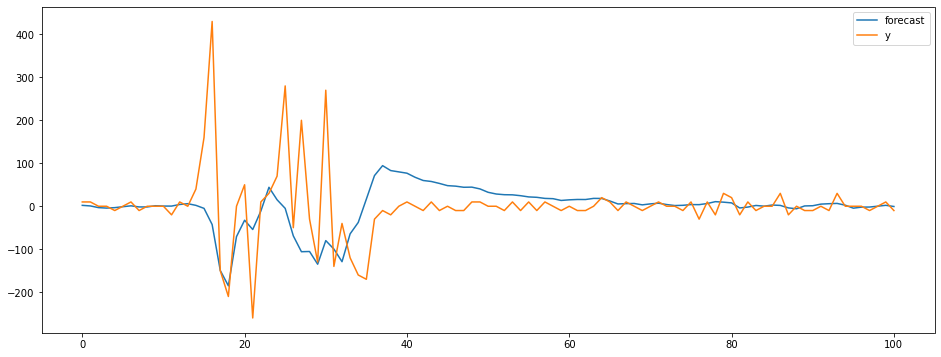

In [47]:
model = ARMA(edata['appl'].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [49]:
rmse = math.sqrt(mean_squared_error(edata['appl'].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 100.90139272142278.


ARIMA MOdel

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                19733
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -116305.226
Method:                       css-mle   S.D. of innovations             87.794
Date:                Mon, 25 Jul 2022   AIC                         232618.452
Time:                        16:13:38   BIC                         232650.013
Sample:                             1   HQIC                        232628.785
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.318      0.014      0.989      -0.619       0.628
ar.L1.D.y     -0.5710      0.007    -87.279      0.000      -0.584      -0.558
ar.L2.D.y     -0.3941      0.007    -60.240      0.0

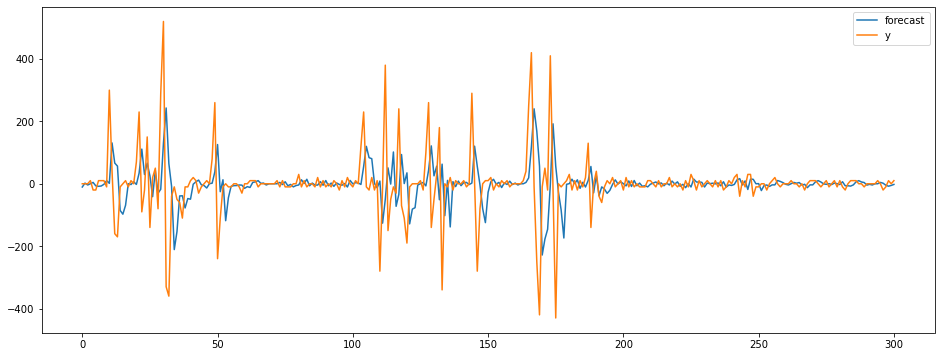

In [50]:
# Predicting the Appliances_energy
rcParams['figure.figsize'] = 16, 6
model = ARIMA(edata['appl'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [51]:
rmse = math.sqrt(mean_squared_error(edata['appl'].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 167.53771485581905.


##VAR Models

                           Statespace Model Results                           
Dep. Variable:        ['appl', 'lgt']   No. Observations:                19734
Model:                     VARMA(2,1)   Log Likelihood             -169262.560
                          + intercept   AIC                         338559.120
Date:                Mon, 25 Jul 2022   BIC                         338693.251
Time:                        16:21:14   HQIC                        338603.032
Sample:                             0                                         
                              - 19734                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):            3.03, 15.27   Jarque-Bera (JB):   387039.37, 50084.70
Prob(Q):                        0.08, 0.00   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):         0.78, 0.50   Skew:                        2.85, 1.12
Prob(H) (two-sided):            0.

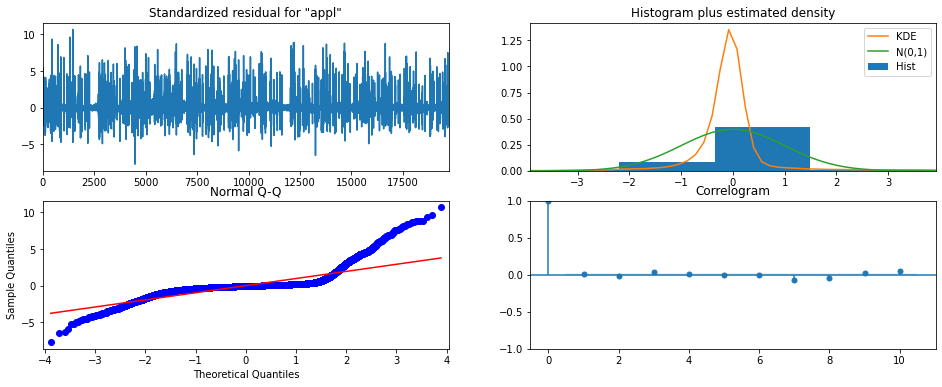

In [53]:
# Predicting energy use by Appliances and lights
train_sample = pd.concat([edata['appl'].diff().iloc[1:],edata['lgt'].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                19734
Model:               SARIMAX(4, 0, 4)   Log Likelihood             -110791.240
Date:                Mon, 25 Jul 2022   AIC                         221602.480
Time:                        16:22:13   BIC                         221681.381
Sample:                             0   HQIC                        221628.310
                              - 19734                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.117      0.009      0.992      -0.227       0.229
ar.L1          0.8670      0.077     11.289      0.000       0.716       1.018
ar.L2         -0.8739      0.086    -10.153      0.0

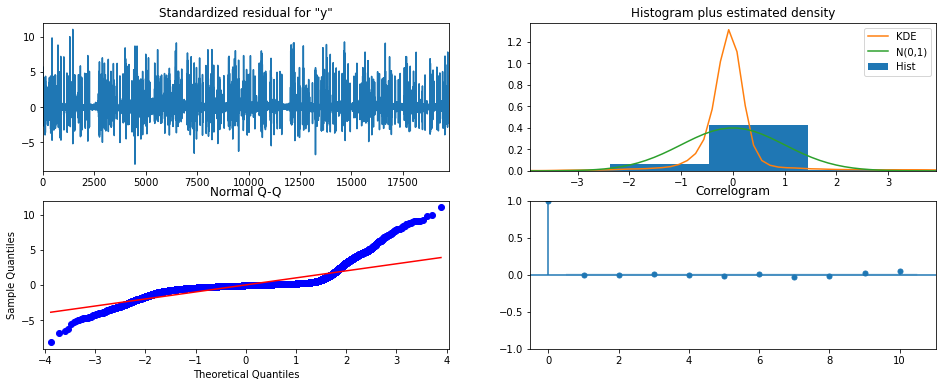

In [54]:
# Predicting Appliance energy
train_sample = edata['appl'].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

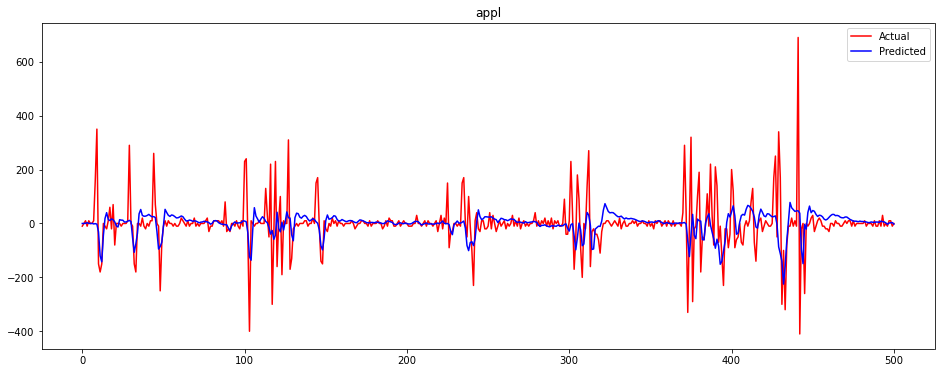

In [55]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('appl')
plt.show()

##Dynamic Factor Models

                                   Statespace Model Results                                  
Dep. Variable:                       ['appl', 'lgt']   No. Observations:                19734
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood             -173002.751
Date:                               Mon, 25 Jul 2022   AIC                         346017.502
Time:                                       16:26:44   BIC                         346064.843
Sample:                                            0   HQIC                        346033.001
                                             - 19734                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):         63.77, 2906.96   Jarque-Bera (JB):   304201.26, 34680.20
Prob(Q):                        0.00, 0.00   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):         0.81, 0.52   Skew:                        1.14

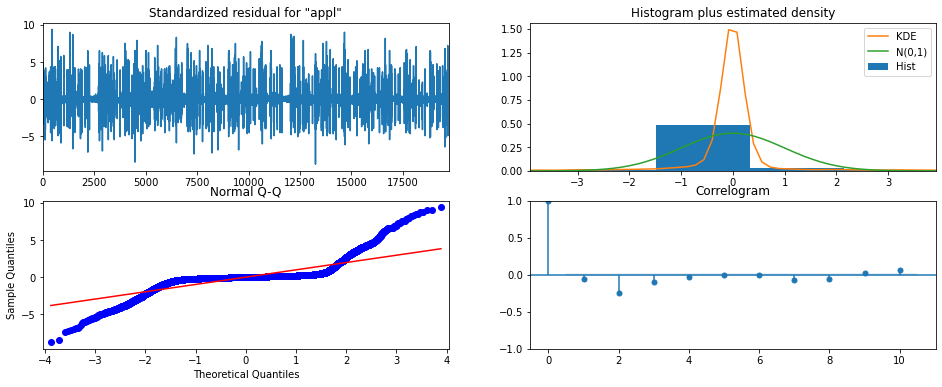

In [59]:
# Predicting Appliances and lights energy
train_sample = pd.concat([edata['appl'].diff().iloc[1:],edata['lgt'].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

##Count of Outliers using IQR Method

In [61]:
x = edata.drop(['lgt'],axis = 1)
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x.columns:
    count_outliers(edata,i)

There are outliers in date
Count of outliers are: 1338
There are outliers in appl
Count of outliers are: 2138
There are outliers in temp1
Count of outliers are: 515
There are outliers in RH_1
Count of outliers are: 146
There are outliers in T2
Count of outliers are: 546
There are outliers in RH_2
Count of outliers are: 235
There are outliers in T3
Count of outliers are: 217
There are outliers in RH_3
Count of outliers are: 15
There are outliers in T4
Count of outliers are: 186
No outliers in RH_4
There are outliers in T5
Count of outliers are: 182
There are outliers in RH_5
Count of outliers are: 1330
There are outliers in T6
Count of outliers are: 515
No outliers in RH_6
There are outliers in T7
Count of outliers are: 2
There are outliers in RH_7
Count of outliers are: 42
There are outliers in T8
Count of outliers are: 71
There are outliers in RH_8
Count of outliers are: 17
No outliers in T9
There are outliers in RH_9
Count of outliers are: 23
There are outliers in T_out
Count of outl